In [1]:
# Import necessary libraries. 

import os
import re
import glob
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import skimage as ski
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
import pysindy as ps
import statsmodels.api as sm

In [3]:
# # We simulate data from a system that might obey the heat equation.
# # Define spatial and temporal grids:
# x = np.linspace(0, 10, 100)     # spatial domain
# t = np.linspace(0, 5, 50)       # temporal domain
# X, T = np.meshgrid(x, t)

# # For example, use a decaying sinusoidal mode as synthetic data:
# u = np.exp(-T) * np.sin(np.pi * X / 10)  # u(x,t) = exp(-t)*sin(pi*x/10)

# # Plot one snapshot to see the data at one time instance:
# plt.figure(figsize=(8, 4))
# plt.plot(x, u[10, :])
# plt.title("Snapshot of synthetic data at t = {:.2f}".format(t[10]))
# plt.xlabel("x")
# plt.ylabel("u(x,t)")
# plt.show()

# # =============================================================================
# # 2. Sparse Regression to Discover the PDE using PySINDy
# # -----------------------------------------------------------------------------
# # PySINDy expects data in a time-series format, where each snapshot (state at one time)
# # is a row of the matrix. Here, each row is the spatial state at a given time.
# u_time_series = u  # shape (n_time_steps, n_space_points)

# # Define a library of candidate functions (here we use polynomials up to degree 3).
# # In a full PDE discovery setup, you would also include spatial derivatives.
# library = ps.PolynomialLibrary(degree=3)

# # Set up the optimizer for sparse regression.
# optimizer = ps.STLSQ(threshold=0.1)

# # Create the SINDy model.
# model = ps.SINDy(feature_library=library, optimizer=optimizer)

# # Fit the model using our time series data. The time step 't' is passed as dt.
# model.fit(u_time_series, t=t[1]-t[0])
# print("Discovered PDE model:")
# model.print()

# # Note: In many PDE discovery problems, you need to augment the library
# # with spatial derivatives. PySINDy can be extended for PDEs, but this simple
# # example demonstrates the workflow on spatiotemporal data.

# # =============================================================================
# # 3. Simulate the PDE (Using the discovered model)
# # -----------------------------------------------------------------------------
# # With the discovered model, you can simulate the evolution starting from an initial condition.
# # Here we use the first snapshot as the initial condition.
# u0 = u_time_series[0]
# u_sim = model.simulate(u0, t)

# # =============================================================================
# # 4. Visualization: Generate Images at Different Time Steps
# # -----------------------------------------------------------------------------
# # Here, we plot the simulated state at several time points.
# for i, snapshot in enumerate(u_sim):
#     plt.figure(figsize=(8, 4))
#     plt.plot(x, snapshot, 'k-', lw=2)
#     plt.title("Simulated State at t = {:.2f}".format(t[i]))
#     plt.xlabel("x")
#     plt.ylabel("u(x,t)")
#     plt.grid(True)
#     plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


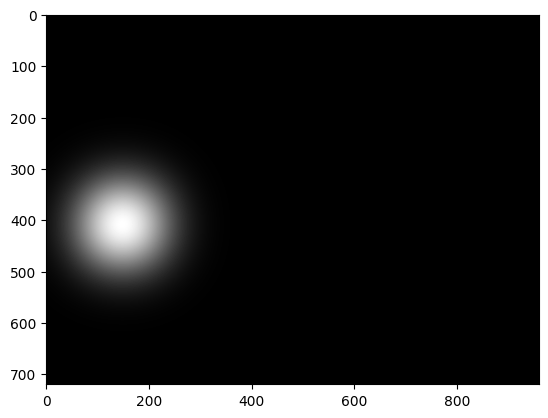

In [2]:
image_1 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_1.jpg", as_gray=True)
image_1 = np.where(image_1 == 1, 0, 1)
image_1 = ski.filters.gaussian(image_1, sigma=55)
image_1 = image_1 * 1e10
plt.imshow(image_1, cmap="gray")
#print(image_1)

h = 1

# Forward Difference for first derivatives and second derivatives.

dx1 = np.gradient(image_1, h, axis=1)
dy1 = np.gradient(image_1, h, axis=0)
dxx1 = np.gradient(dx1, h, axis=1)
dyy1 = np.gradient(dy1, h, axis=0)

print(dx1)
print(dy1)
print(dxx1)
print(dyy1)
# image_1 = pd.DataFrame(image_1)
# image_1.iloc[400, 190]

In [115]:
image_1.shape

(720, 960)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


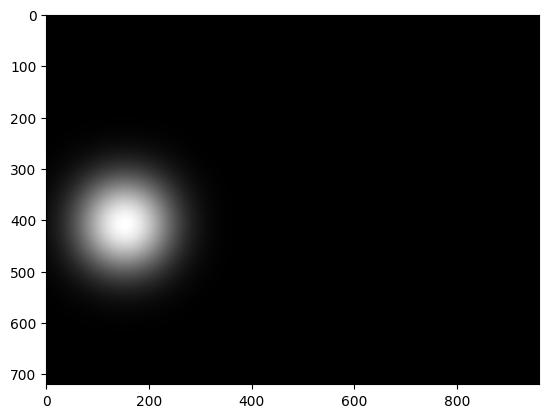

In [3]:
image_2 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_2.jpg", as_gray=True)
image_2 = np.where(image_2 == 1, 0, 1)
image_2 = ski.filters.gaussian(image_2, sigma=55)
image_2 = image_2 *1e10
plt.imshow(image_2, cmap="gray")

dx2 = np.gradient(image_2, h, axis=1)
dy2 = np.gradient(image_2, h, axis=0)
dxx2 = np.gradient(dx2, h, axis=1)
dyy2 = np.gradient(dy2, h, axis=0)

print(dx2)
print(dy2)
print(dxx2)
print(dyy2)

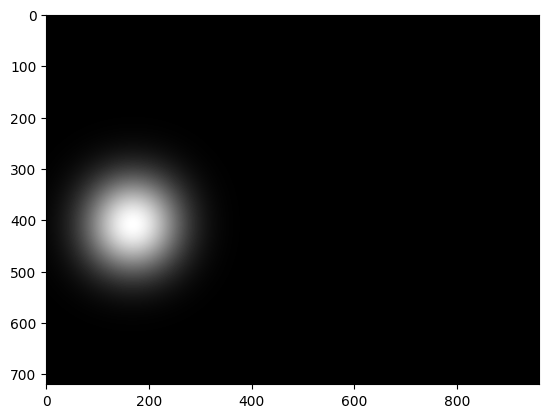

In [4]:
image_3 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_3.jpg", as_gray=True)
image_3 = np.where(image_3 == 1, 0, 1)
image_3 = ski.filters.gaussian(image_3, sigma=55)
image_3 = image_3 * 1e10
plt.imshow(image_3, cmap="gray")

dx3 = np.gradient(image_3, h, axis=1)
dy3 = np.gradient(image_3, h, axis=0)
dxx3 = np.gradient(dx3, h, axis=1)
dyy3 = np.gradient(dy3, h, axis=0)


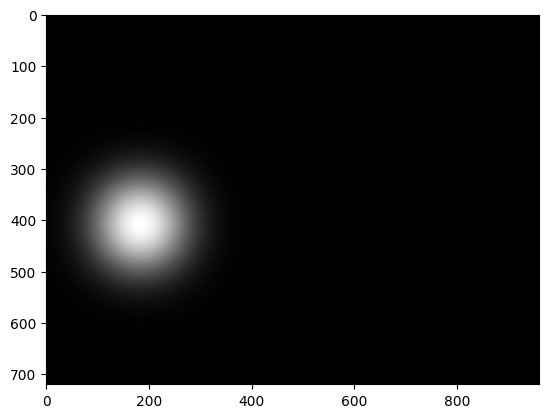

In [5]:
image_4 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_4.jpg", as_gray=True)
image_4 = np.where(image_4 == 1, 0, 1)
image_4 = ski.filters.gaussian(image_4, sigma=55)
image_4 = image_4 * 1e10
plt.imshow(image_4, cmap="gray")

dx4 = np.gradient(image_4, h, axis=1)
dy4 = np.gradient(image_4, h, axis=0)
dxx4 = np.gradient(dx4, h, axis=1)
dyy4 = np.gradient(dy4, h, axis=0)

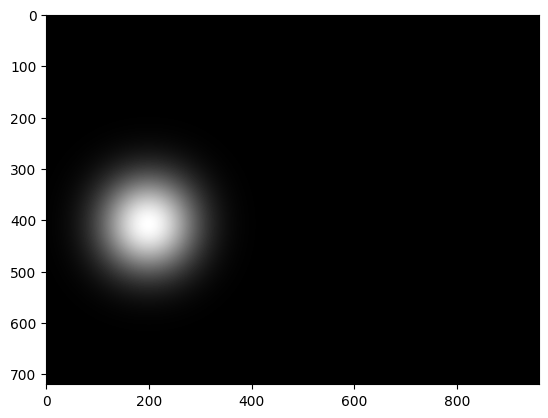

In [6]:
image_5 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_5.jpg", as_gray=True)
image_5 = np.where(image_5 == 1, 0, 1)
image_5 = ski.filters.gaussian(image_5, sigma=55)
image_5 = image_5 * 1e10
plt.imshow(image_5, cmap="gray")

dx5 = np.gradient(image_5, h, axis=1)
dy5 = np.gradient(image_5, h, axis=0)
dxx5 = np.gradient(dx5, h, axis=1)
dyy5 = np.gradient(dy5, h, axis=0)

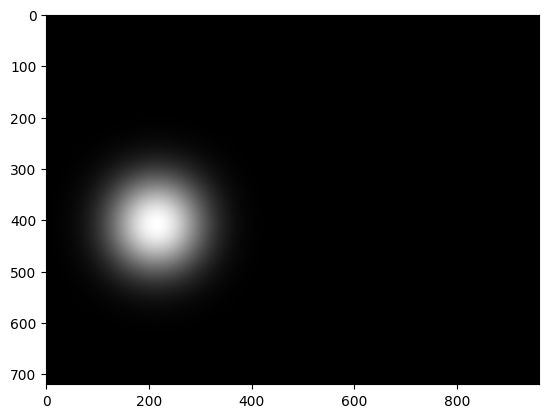

In [7]:
image_6 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_6.jpg", as_gray=True)
image_6 = np.where(image_6 == 1, 0, 1)
image_6 = ski.filters.gaussian(image_6, sigma=55)
image_6 = image_6 * 1e10
plt.imshow(image_6, cmap="gray")

dx6 = np.gradient(image_6, h, axis=1)
dy6 = np.gradient(image_6, h, axis=0)
dxx6 = np.gradient(dx6, h, axis=1)
dyy6 = np.gradient(dy6, h, axis=0)

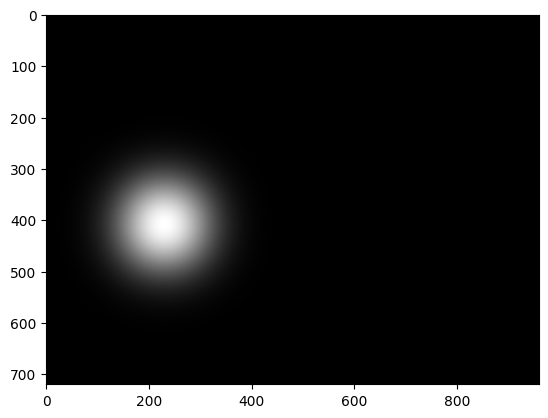

In [8]:
image_7 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_7.jpg", as_gray=True)
image_7 = np.where(image_7 == 1, 0, 1)
image_7 = ski.filters.gaussian(image_7, sigma=55)
image_7 = image_7 * 1e10
plt.imshow(image_7, cmap="gray")

dx7 = np.gradient(image_7, h, axis=1)
dy7 = np.gradient(image_7, h, axis=0)
dxx7 = np.gradient(dx7, h, axis=1)
dyy7 = np.gradient(dy7, h, axis=0)

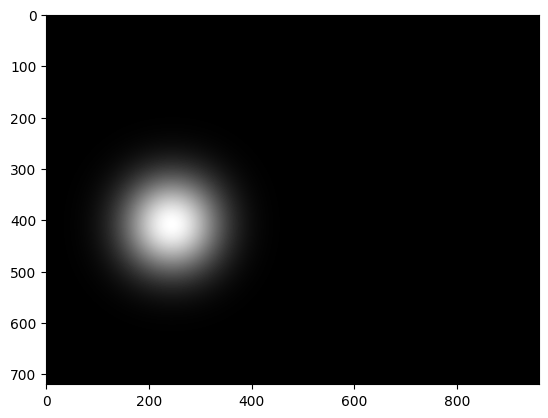

In [9]:
image_8 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_8.jpg", as_gray=True)
image_8 = np.where(image_8 == 1, 0, 1)
image_8 = ski.filters.gaussian(image_8, sigma=55)
image_8 = image_8 * 1e10
plt.imshow(image_8, cmap="gray")

dx8 = np.gradient(image_8, h, axis=1)
dy8 = np.gradient(image_8, h, axis=0)
dxx8 = np.gradient(dx8, h, axis=1)
dyy8 = np.gradient(dy8, h, axis=0)

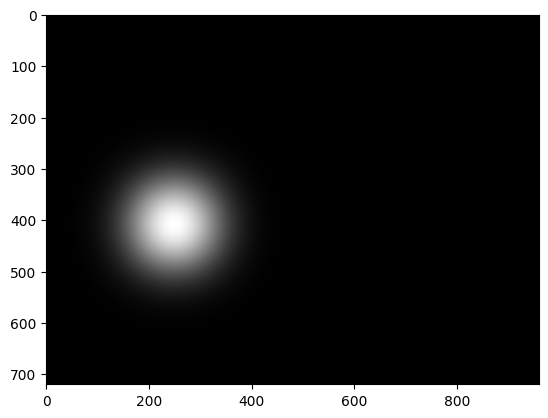

In [10]:
image_9 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_9.jpg", as_gray=True)
image_9 = np.where(image_9 == 1, 0, 1)
image_9 = ski.filters.gaussian(image_9, sigma=55)
image_9 = image_9 * 1e10
plt.imshow(image_9, cmap="gray")

dx9 = np.gradient(image_9, h, axis=1)
dy9 = np.gradient(image_9, h, axis=0)
dxx9 = np.gradient(dx9, h, axis=1)
dyy9 = np.gradient(dy9, h, axis=0)

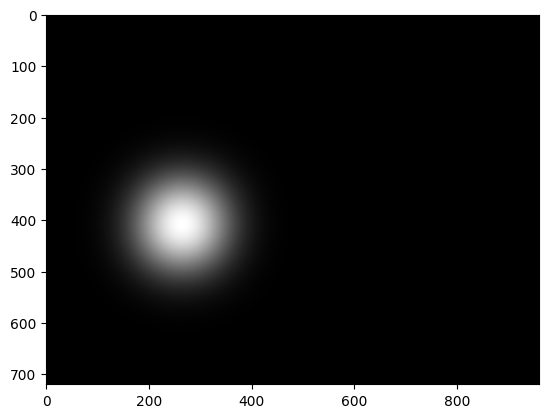

In [11]:
image_10 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_10.jpg", as_gray=True)
image_10 = np.where(image_10 == 1, 0, 1)
image_10 = ski.filters.gaussian(image_10, sigma=55)
image_10 = image_10 * 1e10
plt.imshow(image_10, cmap="gray")

dx10 = np.gradient(image_10, h, axis=1)
dy10 = np.gradient(image_10, h, axis=0)
dxx10 = np.gradient(dx10, h, axis=1)
dyy10 = np.gradient(dy10, h, axis=0)

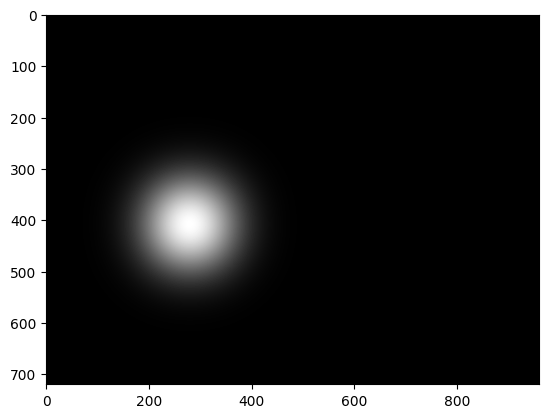

In [12]:
image_11 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_11.jpg", as_gray=True)
image_11 = np.where(image_11 == 1, 0, 1)
image_11 = ski.filters.gaussian(image_11, sigma=55)
image_11 = image_11 * 1e10
plt.imshow(image_11, cmap="gray")

dx11 = np.gradient(image_11, h, axis=1)
dy11 = np.gradient(image_11, h, axis=0)
dxx11 = np.gradient(dx11, h, axis=1)
dyy11 = np.gradient(dy11, h, axis=0)

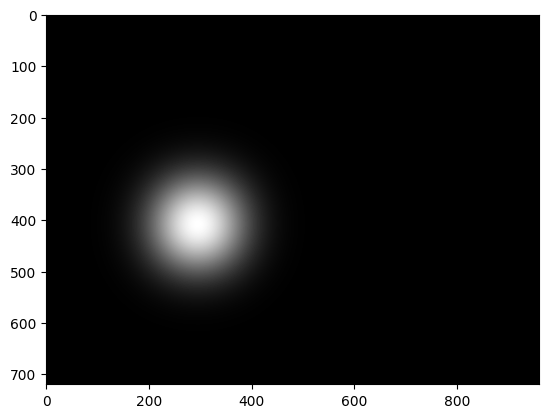

In [13]:
image_12 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_12.jpg", as_gray=True)
image_12 = np.where(image_12 == 1, 0, 1)
image_12 = ski.filters.gaussian(image_12, sigma=55)
image_12 = image_12 * 1e10
plt.imshow(image_12, cmap="gray")

dx12 = np.gradient(image_12, h, axis=1)
dy12 = np.gradient(image_12, h, axis=0)
dxx12 = np.gradient(dx12, h, axis=1)
dyy12 = np.gradient(dy12, h, axis=0)

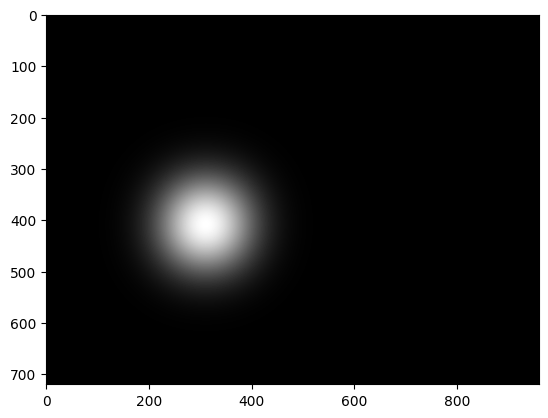

In [14]:
image_13 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_13.jpg", as_gray=True)
image_13 = np.where(image_13 == 1, 0, 1)
image_13 = ski.filters.gaussian(image_13, sigma=55)
image_13 = image_13 * 1e10
plt.imshow(image_13, cmap="gray")

dx13 = np.gradient(image_13, h, axis=1)
dy13 = np.gradient(image_13, h, axis=0)
dxx13 = np.gradient(dx13, h, axis=1)
dyy13 = np.gradient(dy13, h, axis=0)


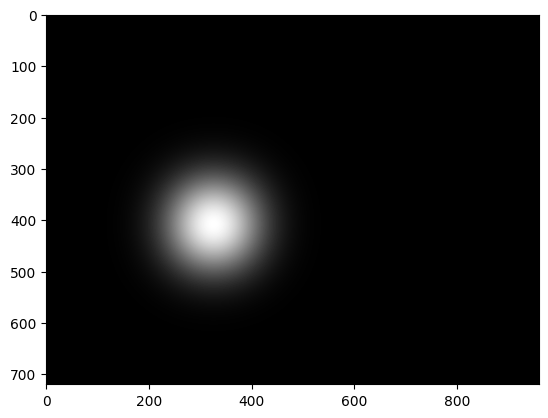

In [15]:
image_14 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_14.jpg", as_gray=True)
image_14 = np.where(image_14 == 1, 0, 1)
image_14 = ski.filters.gaussian(image_14, sigma=55)
image_14 = image_14 * 1e10
plt.imshow(image_14, cmap="gray")

dx14 = np.gradient(image_14, h, axis=1)
dy14 = np.gradient(image_14, h, axis=0)
dxx14 = np.gradient(dx14, h, axis=1)
dyy14 = np.gradient(dy14, h, axis=0)

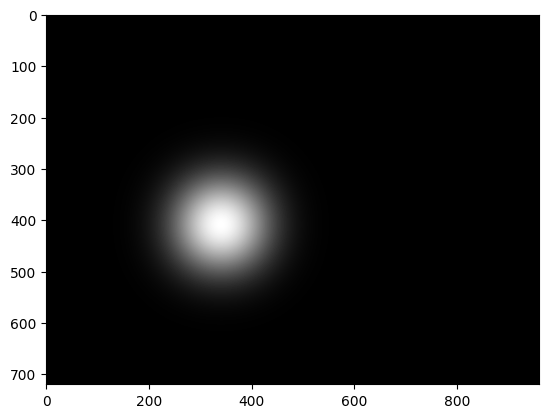

In [16]:
image_15 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_15.jpg", as_gray=True)
image_15 = np.where(image_15 == 1, 0, 1)
image_15 = ski.filters.gaussian(image_15, sigma=55)
image_15 = image_15 * 1e10
plt.imshow(image_15, cmap="gray")

dx15 = np.gradient(image_15, h, axis=1)
dy15 = np.gradient(image_15, h, axis=0)
dxx15 = np.gradient(dx15, h, axis=1)
dyy15 = np.gradient(dy15, h, axis=0)

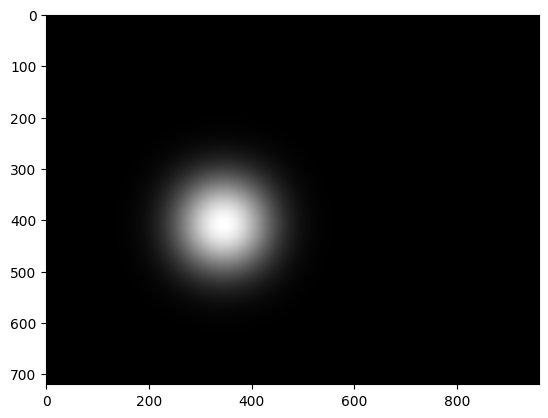

In [17]:
image_16 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_16.jpg", as_gray=True)
image_16 = np.where(image_16 == 1, 0, 1)
image_16 = ski.filters.gaussian(image_16, sigma=55)
image_16 = image_16 * 1e10
plt.imshow(image_16, cmap="gray")

dx16 = np.gradient(image_16, h, axis=1)
dy16 = np.gradient(image_16, h, axis=0)
dxx16 = np.gradient(dx16, h, axis=1)
dyy16 = np.gradient(dy16, h, axis=0)

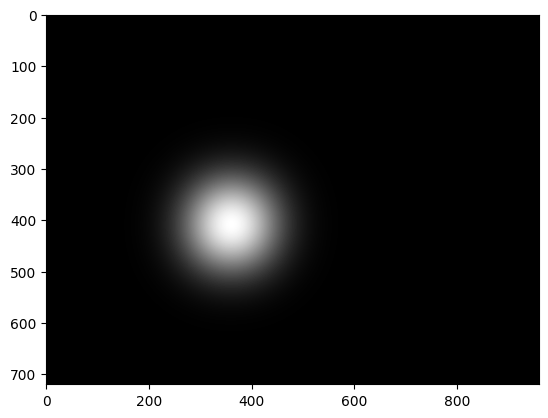

In [18]:
image_17 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_17.jpg", as_gray=True)
image_17 = np.where(image_17 == 1, 0, 1)
image_17 = ski.filters.gaussian(image_17, sigma=55)
image_17 = image_17 * 1e10
plt.imshow(image_17, cmap="gray")

dx17 = np.gradient(image_17, h, axis=1)
dy17 = np.gradient(image_17, h, axis=0)
dxx17 = np.gradient(dx17, h, axis=1)
dyy17 = np.gradient(dy17, h, axis=0)

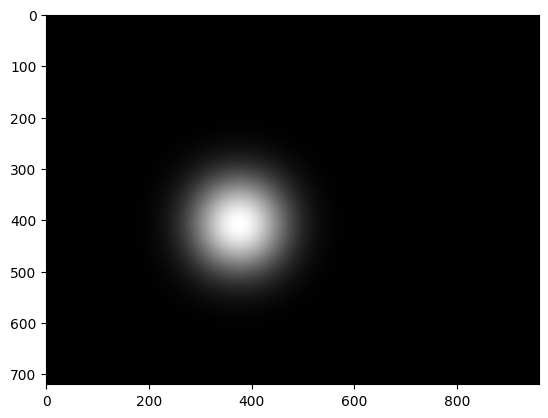

In [19]:
image_18 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_18.jpg", as_gray=True)
image_18 = np.where(image_18 == 1, 0, 1)
image_18 = ski.filters.gaussian(image_18, sigma=55)
image_18 = image_18 * 1e10
plt.imshow(image_18, cmap="gray")

dx18 = np.gradient(image_18, h, axis=1)
dy18 = np.gradient(image_18, h, axis=0)
dxx18 = np.gradient(dx18, h, axis=1)
dyy18 = np.gradient(dy18, h, axis=0)

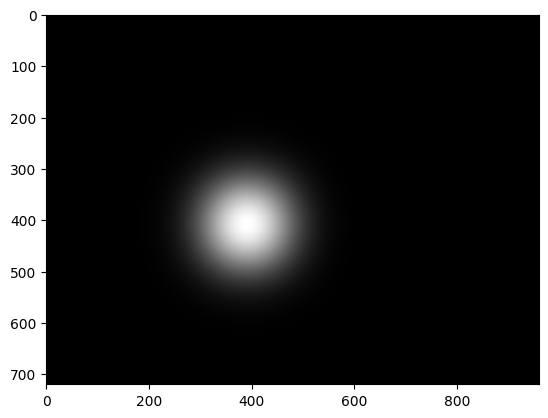

In [20]:
image_19 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_19.jpg", as_gray=True)
image_19 = np.where(image_19 == 1, 0, 1)
image_19 = ski.filters.gaussian(image_19, sigma=55)
image_19 = image_19 * 1e10
plt.imshow(image_19, cmap="gray")

dx19 = np.gradient(image_19, h, axis=1)
dy19 = np.gradient(image_19, h, axis=0)
dxx19 = np.gradient(dx19, h, axis=1)
dyy19 = np.gradient(dy19, h, axis=0)

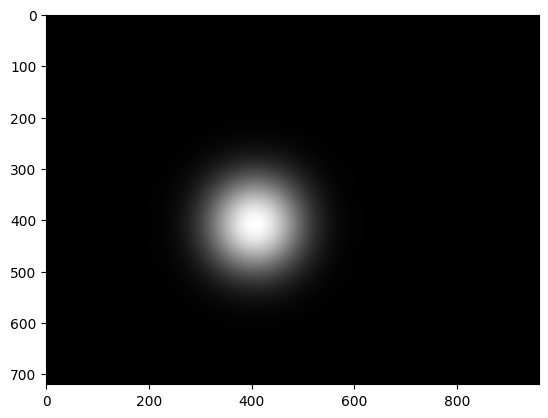

In [21]:
image_20 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_20.jpg", as_gray=True)
image_20 = np.where(image_20 == 1, 0, 1)
image_20 = ski.filters.gaussian(image_20, sigma=55)
image_20 = image_20 * 1e10
plt.imshow(image_20, cmap="gray")

dx20 = np.gradient(image_20, h, axis=1)
dy20 = np.gradient(image_20, h, axis=0)
dxx20 = np.gradient(dx20, h, axis=1)
dyy20 = np.gradient(dy20, h, axis=0)

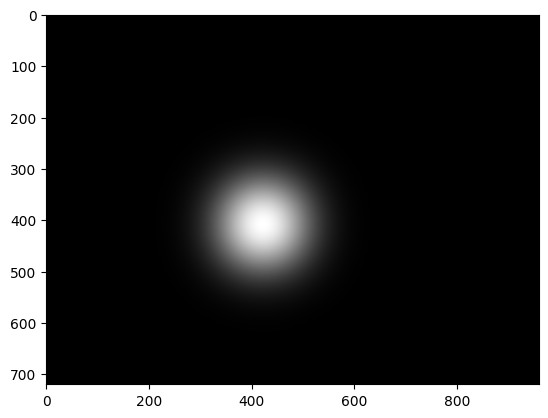

In [22]:
image_21 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_21.jpg", as_gray=True)
image_21 = np.where(image_21 == 1, 0, 1)
image_21 = ski.filters.gaussian(image_21, sigma=55)
image_21 = image_21 * 1e10
plt.imshow(image_21, cmap="gray")

dx21 = np.gradient(image_21, h, axis=1)
dy21 = np.gradient(image_21, h, axis=0)
dxx21 = np.gradient(dy21, h, axis=1)
dyy21 = np.gradient(dy21, h, axis=0)

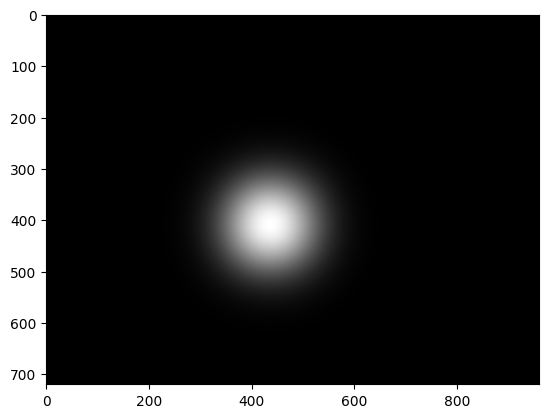

In [ ]:
image_22 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_22.jpg", as_gray=True)
image_22 = np.where(image_22 == 1, 0, 1)
image_22 = ski.filters.gaussian(image_22, sigma=55)
image_22 = image_22 * 1e10
plt.imshow(image_22, cmap="gray")

dx22 = np.gradient(image_22, h, axis=1)
dy22 = np.gradient(image_22, h, axis=0)
dxx22 = np.gradient(dx22, h, axis=1)
dyy22 = np.gradient(dy22, h, axis=0)

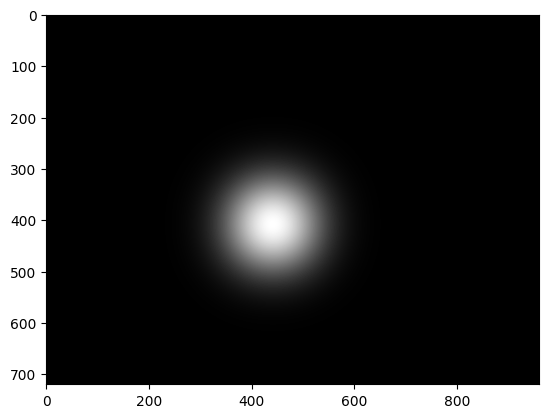

In [24]:
image_23 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_23.jpg", as_gray=True)
image_23 = np.where(image_23 == 1, 0, 1)
image_23 = ski.filters.gaussian(image_23, sigma=55)
image_23 = image_23 * 1e10
plt.imshow(image_23, cmap="gray")

dx23 = np.gradient(image_23, h, axis=1)
dy23 = np.gradient(image_23, h, axis=0)
dxx23 = np.gradient(dx23, h, axis=1)
dyy23 = np.gradient(dy23, h, axis=0)

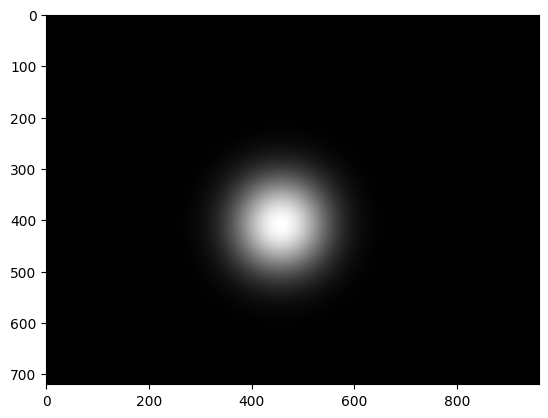

In [25]:
image_24 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_24.jpg", as_gray=True)
image_24 = np.where(image_24 == 1, 0, 1)
image_24 = ski.filters.gaussian(image_24, sigma=55)
image_24 = image_24 * 1e10
plt.imshow(image_24, cmap="gray")

dx24 = np.gradient(image_24, h, axis=1)
dy24 = np.gradient(image_24, h, axis=0)
dxx24 = np.gradient(dx24, h, axis=1)
dyy24 = np.gradient(dy24, h, axis=0)

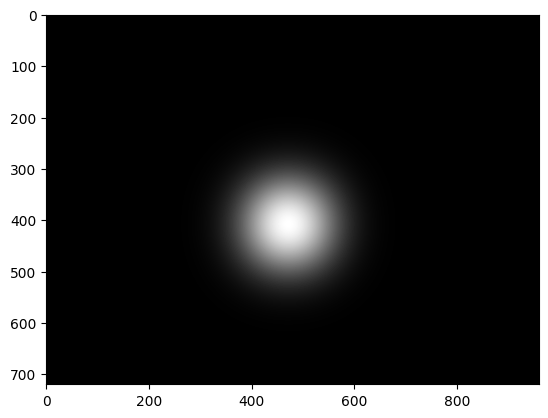

In [26]:
image_25 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_25.jpg", as_gray=True)
image_25 = np.where(image_25 == 1, 0, 1)
image_25 = ski.filters.gaussian(image_25, sigma=55)
image_25 = image_25 * 1e10
plt.imshow(image_25, cmap="gray")

dx25 = np.gradient(image_25, h, axis=1)
dy25 = np.gradient(image_25, h, axis=0)
dxx25 = np.gradient(dx25, h, axis=1)
dyy25 = np.gradient(dy25, h, axis=0)

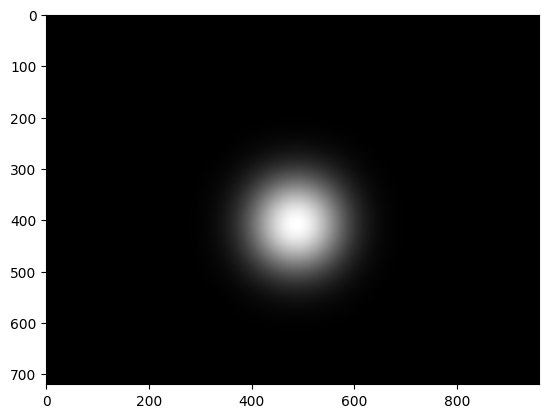

In [27]:
image_26 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_26.jpg", as_gray=True)
image_26 = np.where(image_26 == 1, 0, 1)
image_26 = ski.filters.gaussian(image_26, sigma=55)
image_26 = image_26 * 1e10
plt.imshow(image_26, cmap="gray")

dx26 = np.gradient(image_26, h, axis=1)
dy26 = np.gradient(image_26, h, axis=0)
dxx26 = np.gradient(dx26, h, axis=1)
dyy26 = np.gradient(dy26, h, axis=0)

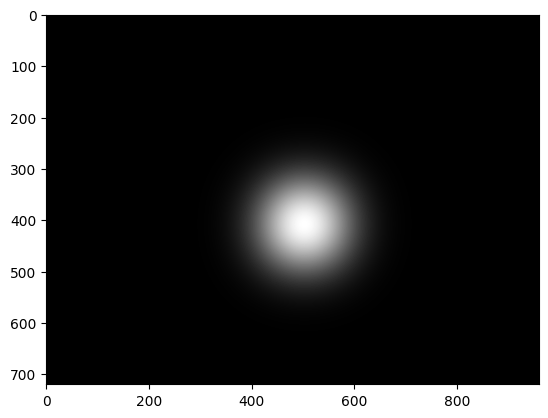

In [28]:
image_27 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_27.jpg", as_gray=True)
image_27 = np.where(image_27 == 1, 0, 1)
image_27 = ski.filters.gaussian(image_27, sigma=55)
image_27 = image_27 * 1e10
plt.imshow(image_27, cmap="gray")

dx27 = np.gradient(image_27, h, axis=1)
dy27 = np.gradient(image_27, h, axis=0)
dxx27 = np.gradient(dx27, h, axis=1)
dyy27 = np.gradient(dy27, h, axis=0)

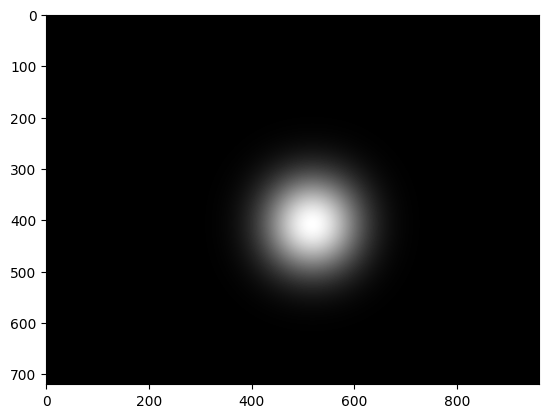

In [29]:
image_28 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_28.jpg", as_gray=True)
image_28 = np.where(image_28 == 1, 0, 1)
image_28 = ski.filters.gaussian(image_28, sigma=55)
image_28 = image_28 * 1e10
plt.imshow(image_28, cmap="gray")

dx28 = np.gradient(image_28, h, axis=1)
dy28 = np.gradient(image_28, h, axis=0)
dxx28 = np.gradient(dx28, h, axis=1)
dyy28 = np.gradient(dy28, h, axis=0)

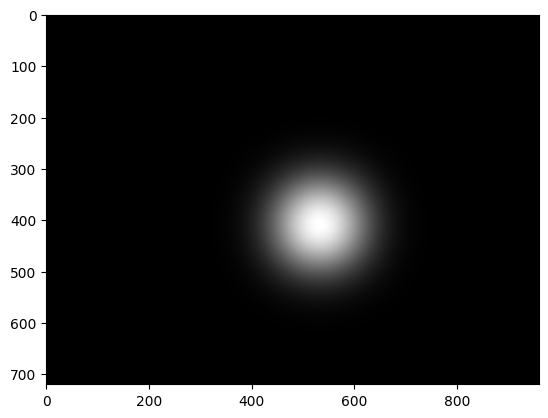

In [30]:
image_29 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_29.jpg", as_gray=True)
image_29 = np.where(image_29 == 1, 0, 1)
image_29 = ski.filters.gaussian(image_29, sigma=55)
image_29 = image_29 * 1e10
plt.imshow(image_29, cmap="gray")

dx29 = np.gradient(image_29, h, axis=1)
dy29 = np.gradient(image_29, h, axis=0)
dxx29 = np.gradient(dx29, h, axis=1)
dyy29 = np.gradient(dy29, h, axis=0)

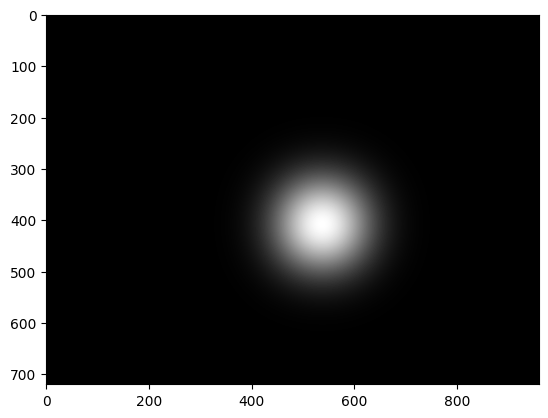

In [31]:
image_30 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_30.jpg", as_gray=True)
image_30 = np.where(image_30 == 1, 0, 1)
image_30 = ski.filters.gaussian(image_30, sigma=55)
image_30 = image_30 * 1e10
plt.imshow(image_30, cmap="gray")

dx30 = np.gradient(image_30, h, axis=1)
dy30 = np.gradient(image_30, h, axis=0)
dxx30 = np.gradient(dx30, h, axis=1)
dyy30 = np.gradient(dy30, h, axis=0)

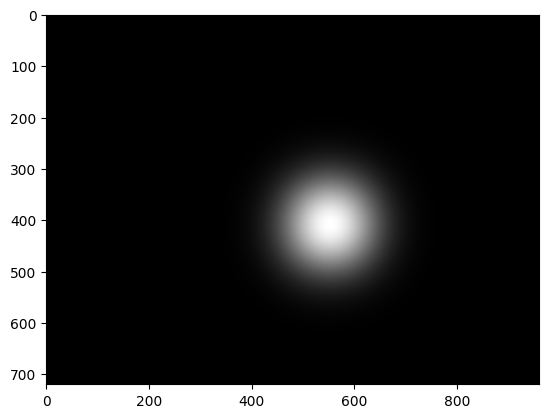

In [32]:
image_31 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_31.jpg", as_gray=True)
image_31 = np.where(image_31 == 1, 0, 1)
image_31 = ski.filters.gaussian(image_31, sigma=55)
image_31 = image_31 * 1e10
plt.imshow(image_31, cmap="gray")

dx31 = np.gradient(image_31, h, axis=1)
dy31 = np.gradient(image_31, h, axis=0)
dxx31 = np.gradient(dx31, h, axis=1)
dyy31 = np.gradient(dy31, h, axis=0)

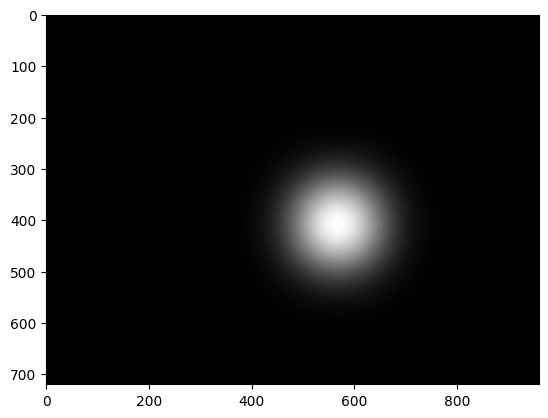

In [33]:
image_32 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_32.jpg", as_gray=True)
image_32 = np.where(image_32 == 1, 0, 1)
image_32 = ski.filters.gaussian(image_32, sigma=55)
image_32 = image_32 * 1e10
plt.imshow(image_32, cmap="gray")

dx32 = np.gradient(image_32, h, axis=1)
dy32 = np.gradient(image_32, h, axis=0)
dxx32 = np.gradient(dx32, h, axis=1)
dyy32 = np.gradient(dy32, h, axis=0)

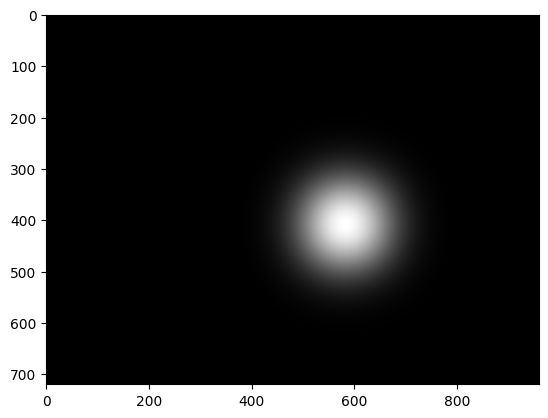

In [34]:
image_33 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_33.jpg", as_gray=True)
image_33 = np.where(image_33 == 1, 0, 1)
image_33 = ski.filters.gaussian(image_33, sigma=55)
image_33 = image_33 * 1e10
plt.imshow(image_33, cmap="gray")

dx33 = np.gradient(image_33, h, axis=1)
dy33 = np.gradient(image_33, h, axis=0)
dxx33 = np.gradient(dx33, h, axis=1)
dyy33 = np.gradient(dy33, h, axis=0)

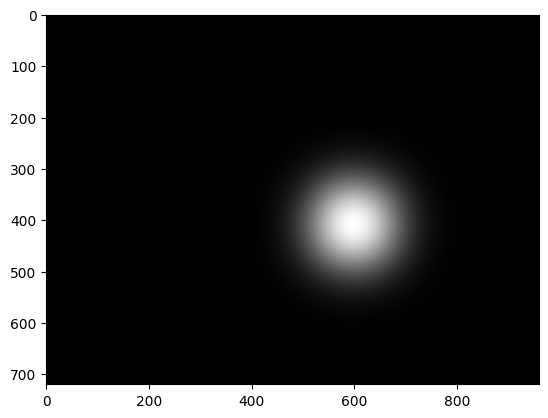

In [35]:
image_34 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_example_Data/moving_square_34.jpg", as_gray=True)
image_34 = np.where(image_34 == 1, 0, 1)
image_34 = ski.filters.gaussian(image_34, sigma=55)
image_34 = image_34 * 1e10
plt.imshow(image_34, cmap="gray")

dx34 = np.gradient(image_34, h, axis=1)
dy34 = np.gradient(image_34, h, axis=0)
dxx34 = np.gradient(dx34, h, axis=1)
dyy34 = np.gradient(dy34, h, axis=0)

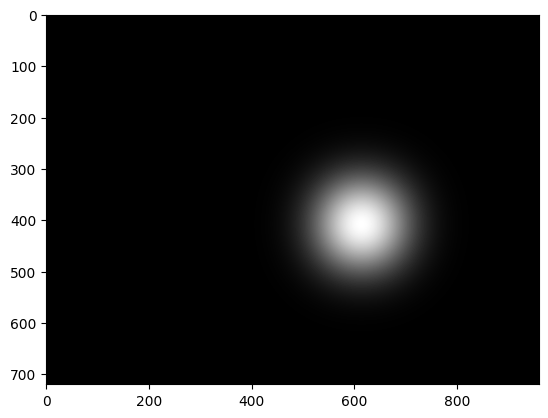

In [36]:
image_35 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_35.jpg", as_gray=True)
image_35 = np.where(image_35 == 1, 0, 1)
image_35 = ski.filters.gaussian(image_35, sigma=55)
image_35 = image_35 * 1e10
plt.imshow(image_35, cmap="gray")

dx35 = np.gradient(image_35, h, axis=1)
dy35 = np.gradient(image_35, h, axis=0)
dxx35 = np.gradient(dx35, h, axis=1)
dyy35 = np.gradient(dy35, h, axis=0)

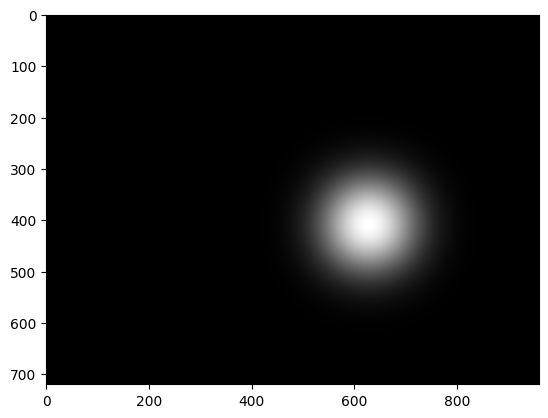

In [37]:
image_36 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_36.jpg", as_gray=True)
image_36 = np.where(image_36 == 1, 0, 1)
image_36 = ski.filters.gaussian(image_36, sigma=55)
image_36 = image_36 * 1e10
plt.imshow(image_36, cmap="gray")

dx36 = np.gradient(image_36, h, axis=1)
dy36 = np.gradient(image_36, h, axis=0)
dxx36 = np.gradient(dx36, h, axis=1)
dyy36 = np.gradient(dy36, h, axis=0)

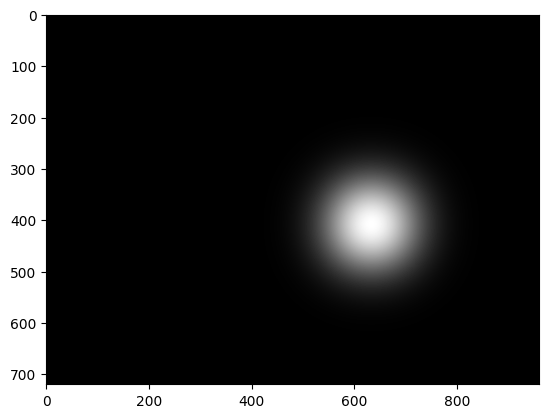

In [38]:
image_37 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_37.jpg", as_gray=True)
image_37 = np.where(image_37 == 1, 0, 1)
image_37 = ski.filters.gaussian(image_37, sigma=55)
image_37 = image_37 * 1e10
plt.imshow(image_37, cmap="gray")

dx37 = np.gradient(image_37, h, axis=1)
dy37 = np.gradient(image_37, h, axis=0)
dxx37 = np.gradient(dx37, h, axis=1)
dyy37 = np.gradient(dy37, h, axis=0)

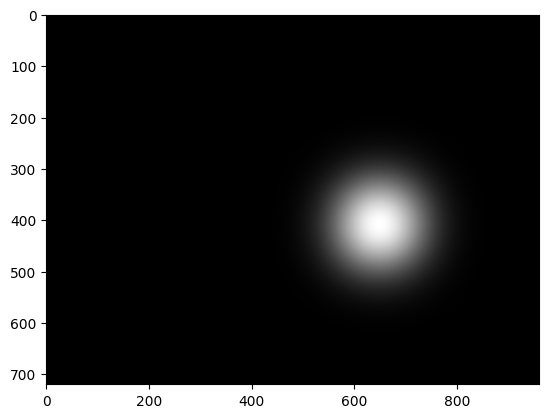

In [39]:
image_38 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_38.jpg", as_gray=True)
image_38 = np.where(image_38 == 1, 0, 1)
image_38 = ski.filters.gaussian(image_38, sigma=55)
image_38 = image_38 * 1e10
plt.imshow(image_38, cmap="gray")

dx38 = np.gradient(image_38, h, axis=1)
dy38 = np.gradient(image_38, h, axis=0)
dxx38 = np.gradient(dx38, h, axis=1)
dyy38 = np.gradient(dy38, h, axis=0)

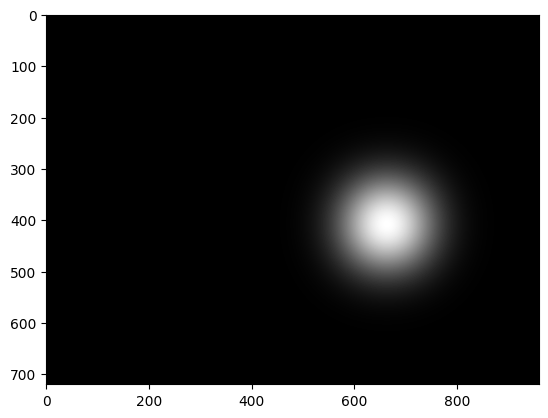

In [40]:
image_39 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_39.jpg", as_gray=True)
image_39 = np.where(image_39 == 1, 0, 1)
image_39 = ski.filters.gaussian(image_39, sigma=55)
image_39 = image_39 * 1e10
plt.imshow(image_39, cmap="gray")

dx39 = np.gradient(image_39, h, axis=1)
dy39 = np.gradient(image_39, h, axis=0)
dxx39 = np.gradient(dx39, h, axis=1)
dyy39 = np.gradient(dy39, h, axis=0)

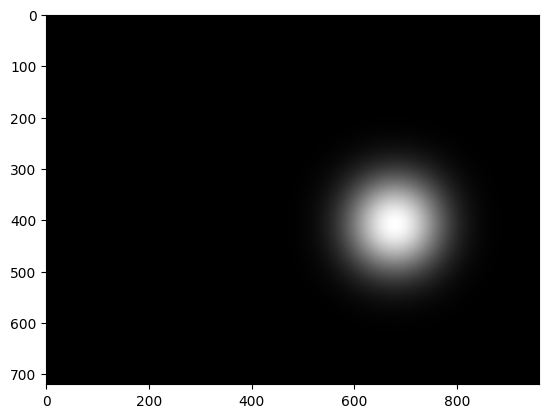

In [41]:
image_40 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_40.jpg", as_gray=True)
image_40 = np.where(image_40 == 1, 0, 1)
image_40 = ski.filters.gaussian(image_40, sigma=55)
image_40 = image_40 * 1e10
plt.imshow(image_40, cmap="gray")

dx40 = np.gradient(image_40, h, axis=1)
dy40 = np.gradient(image_40, h, axis=0)
dxx40 = np.gradient(dx40, h, axis=1)
dyy40 = np.gradient(dy40, h, axis=0)

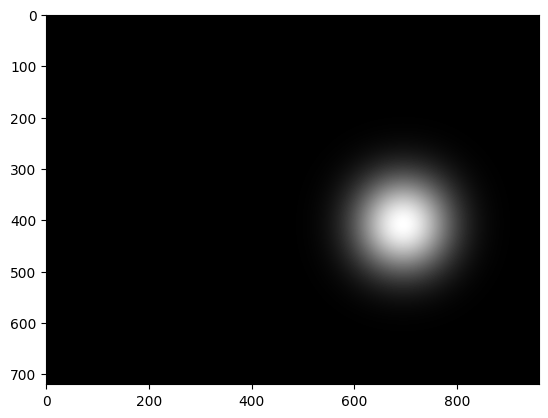

In [42]:
image_41 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_41.jpg", as_gray=True)
image_41 = np.where(image_41 == 1, 0, 1)
image_41 = ski.filters.gaussian(image_41, sigma=55)
image_41 = image_41 * 1e10
plt.imshow(image_41, cmap="gray")

dx41 = np.gradient(image_41, h, axis=1)
dy41 = np.gradient(image_41, h, axis=0)
dxx41 = np.gradient(dx41, h, axis=1)
dyy41 = np.gradient(dy41, h, axis=0)

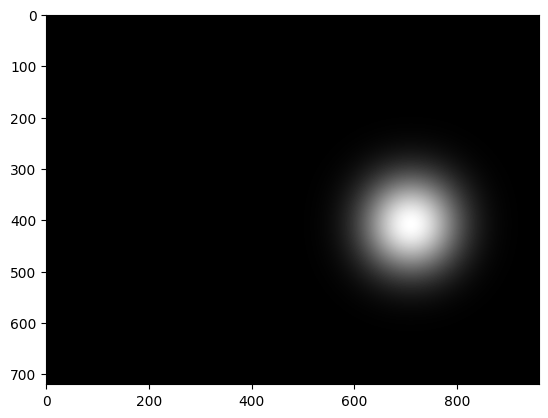

In [43]:
image_42 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_42.jpg", as_gray=True)
image_42 = np.where(image_42 == 1, 0, 1)
image_42 = ski.filters.gaussian(image_42, sigma=55)
image_42 = image_42 * 1e10
plt.imshow(image_42, cmap="gray")

dx42 = np.gradient(image_42, h, axis=1)
dy42 = np.gradient(image_42, h, axis=0)
dxx42 = np.gradient(dx42, h, axis=1)
dyy42 = np.gradient(dy42, h, axis=0)

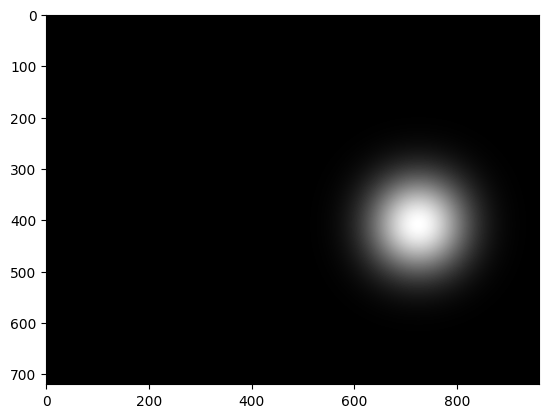

In [44]:
image_43 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_43.jpg", as_gray=True)
image_43 = np.where(image_43 == 1, 0, 1)
image_43 = ski.filters.gaussian(image_43, sigma=55)
image_43 = image_43 * 1e10
plt.imshow(image_43, cmap="gray")

dx43 = np.gradient(image_43, h, axis=1)
dy43 = np.gradient(image_43, h, axis=0)
dxx43 = np.gradient(dx43, h, axis=1)
dyy43 = np.gradient(dy43, h, axis=0)

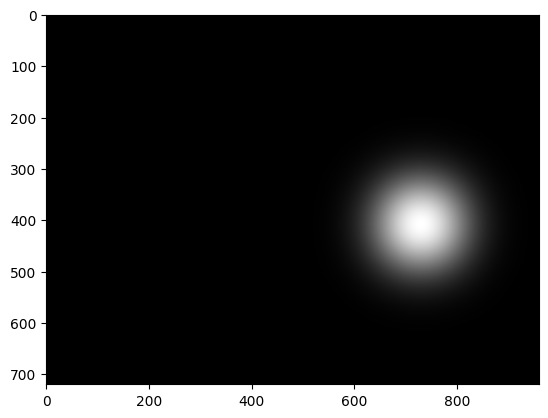

In [45]:
image_44 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_44.jpg", as_gray=True)
image_44 = np.where(image_44 == 1, 0, 1)
image_44 = ski.filters.gaussian(image_44, sigma=55)
image_44 = image_44 * 1e10
plt.imshow(image_44, cmap="gray")

dx44 = np.gradient(image_44, h, axis=1)
dy44 = np.gradient(image_44, h, axis=0)
dxx44 = np.gradient(dx44, h, axis=1)
dyy44 = np.gradient(dy44, h, axis=0)

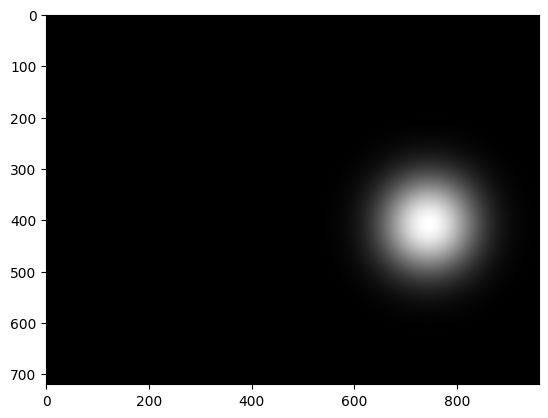

In [46]:
image_45 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_45.jpg", as_gray=True)
image_45 = np.where(image_45 == 1, 0, 1)
image_45 = ski.filters.gaussian(image_45, sigma=55)
image_45 = image_45 * 1e10
plt.imshow(image_45, cmap="gray")

dx45 = np.gradient(image_45, h, axis=1)
dy45 = np.gradient(image_45, h, axis=0)
dxx45 = np.gradient(dx45, h, axis=1)
dyy45 = np.gradient(dy45, h, axis=0)

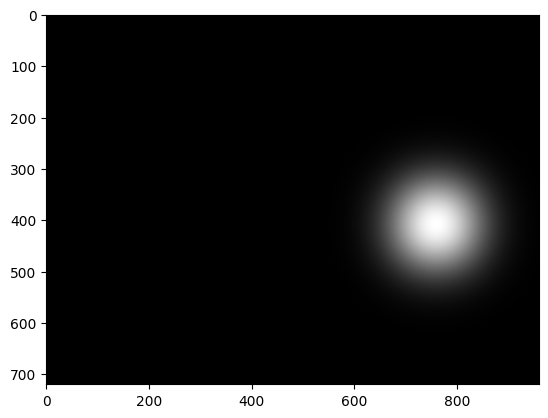

In [51]:
image_46 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_46.jpg", as_gray=True)
image_46 = np.where(image_46 == 1, 0, 1)
image_46 = ski.filters.gaussian(image_46, sigma=55)
image_46 = image_46 * 1e10
plt.imshow(image_46, cmap="gray")

dx46 = np.gradient(image_46, h, axis=1)
dy46 = np.gradient(image_46, h, axis=0)
dxx46 = np.gradient(dx46, h, axis=1)
dyy46 = np.gradient(dy46, h, axis=0)

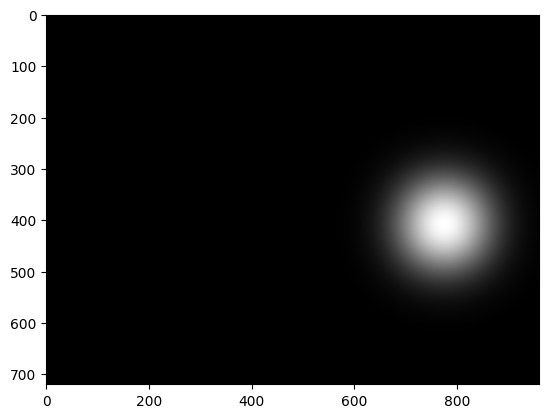

In [ ]:
image_47 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_47.jpg", as_gray=True)
image_47 = np.where(image_47 == 1, 0, 1)
image_47 = ski.filters.gaussian(image_47, sigma=55)
image_47 = image_47 * 1e10
plt.imshow(image_47, cmap="gray")

dx47 = np.gradient(image_47, h, axis=1)
dy47 = np.gradient(image_47, h, axis=0)
dxx47 = np.gradient(dx47, h, axis=1)
dyy47 = np.gradient(dy47, h, axis=0)

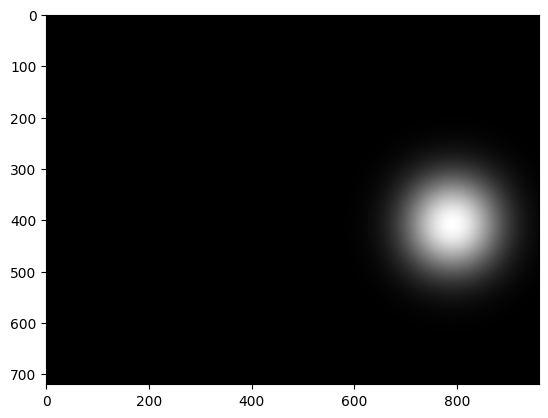

In [53]:
image_48 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_48.jpg", as_gray=True)
image_48 = np.where(image_48 == 1, 0, 1)
image_48 = ski.filters.gaussian(image_48, sigma=55)
image_48 = image_48 * 1e10
plt.imshow(image_48, cmap="gray")

dx48 = np.gradient(image_48, h, axis=1)
dy48 = np.gradient(image_48, h, axis=0)
dxx48 = np.gradient(dx48, h, axis=1)
dyy48 = np.gradient(dy48, h, axis=0)

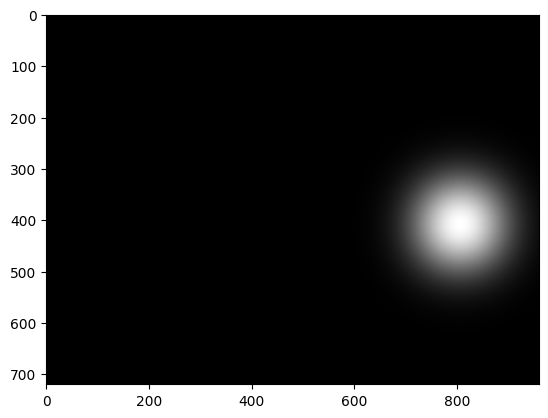

In [54]:
image_49 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_49.jpg", as_gray=True)
image_49 = np.where(image_49 == 1, 0, 1)
image_49 = ski.filters.gaussian(image_49, sigma=55)
image_49 = image_49 * 1e10
plt.imshow(image_49, cmap="gray")

dx49 = np.gradient(image_49, h, axis=1)
dy49 = np.gradient(image_49, h, axis=0)
dxx49 = np.gradient(dx49, h, axis=1)
dyy49 = np.gradient(dy49, h, axis=0)

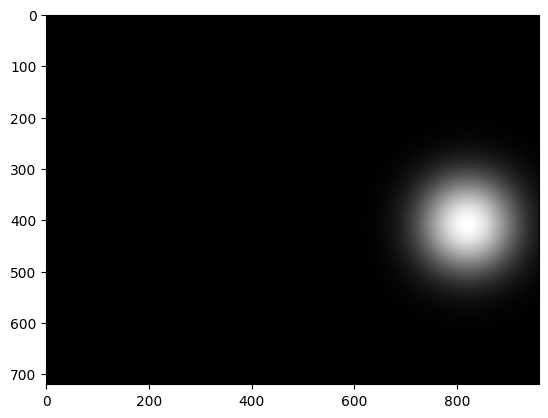

In [55]:
image_50 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_50.jpg", as_gray=True)
image_50 = np.where(image_50 == 1, 0, 1)
image_50 = ski.filters.gaussian(image_50, sigma=55)
image_50 = image_50 * 1e10
plt.imshow(image_50, cmap="gray")

dx50 = np.gradient(image_50, h, axis=1)
dy50 = np.gradient(image_50, h, axis=0)
dxx50 = np.gradient(dx50, h, axis=1)
dyy50 = np.gradient(dy50, h, axis=0)

In [47]:
# Concatenated data matrix of pixel values and gradients. 

us2 = [image_1, image_2, image_3, image_4, image_5, image_6, image_7, image_8, image_9, image_10,
      image_11, image_12, image_13, image_14, image_15, image_16, image_17, image_18,
      image_19, image_20, image_21, image_22, image_23, image_24, image_25,
      image_26, image_27, image_28, image_29, image_30, image_31, image_32, image_33,
      image_34, image_35, image_36, image_37, image_38, image_39, image_40, image_41,
      image_42, image_43, image_44, image_45]


uts2 = [us2[i+1] - us2[i] for i in range(len(us2) - 1)]


dxs2 = [dx1, dx2, dx3, dx4, dx5, dx6, dx7, dx8, dx9, dx10, dx11, dx12, dx13, dx14,
          dx15, dx16, dx17, dx18, dx19, dx20, dx21, dx22, dx23, dx24, dx25, dx26, 
          dx27, dx28, dx29, dx30, dx31, dx32, dx33, dx34, dx35, dx36, dx37, dx38, dx39,
          dx40, dx41, dx42, dx43, dx44, dx45]


dys2 = [dy1, dy2, dy3,dy4, dy5, dy6, dy7, dy8, dy9, dy10, dy11, dy12, dy13, dy14,
       dy15, dy16, dy17, dy18, dy19, dy20, dy21, dy22, dy23, dy24, dy25, dy26, 
          dy27, dy28, dy29, dy30, dy31, dy32, dy33, dy34, dy35, dy36, dy37, dy38, dy39,
          dy40, dy41, dy42, dy43, dy44, dy45]


dxxs2 = [dxx1, dxx2, dxx3, dxx4, dxx5, dxx6, dxx7, dxx8, dxx9, dxx10, dxx11, dxx12, dxx13, dxx14,
          dxx15, dxx16, dxx17, dxx18, dxx19, dxx20, dxx21, dxx22, dxx23, dxx24, dxx25, dxx26, 
          dxx27, dxx28, dxx29, dxx30, dxx31, dxx32, dxx33, dxx34, dxx35, dxx36, dxx37, dxx38, dxx39,
          dxx40, dxx41, dxx42, dxx43, dxx44, dxx45]

dyys2 = [dyy1, dyy2, dyy3, dyy4, dyy5, dyy6, dyy7, dyy8, dyy9, dyy10, dyy11, dyy12, dyy13, dyy14,
          dyy15, dyy16, dyy17, dyy18, dyy19, dyy20, dyy21, dyy22, dyy23, dyy24, dyy25, dyy26, 
          dyy27, dyy28, dyy29, dyy30, dyy31, dyy32, dyy33, dyy34, dyy35, dyy36, dyy37, dyy38, dyy39,
          dyy40, dyy41, dyy42, dyy43, dyy44, dyy45]

flattened_arr_u2 = [u.flatten() for u in us2]
merged_u2 = np.concatenate(flattened_arr_u2)
dfu2 = pd.DataFrame({'u': merged_u2})

# Flatten each matrix into a column vector (1D)
flattened_arrays2 = [dx.flatten() for dx in dxs2]

# Concatenate all arrays into a single column
merged_column2 = np.concatenate(flattened_arrays2)

# Create DataFrame with one column
dfx2 = pd.DataFrame({'dx': merged_column2})

flattened_arr_dy2 = [dy.flatten() for dy in dys2]
merged_dy2 = np.concatenate(flattened_arr_dy2)
dfy2 = pd.DataFrame({'dy': merged_dy2})

flattened_arr_dxx2 = [dxx.flatten() for dxx in dxxs2]
merged_dxx2 = np.concatenate(flattened_arr_dxx2)
dfxx2 = pd.DataFrame({'dxx': merged_dxx2})

flattened_arr_dyy2 = [dyy.flatten() for dyy in dyys2]
merged_dyy2 = np.concatenate(flattened_arr_dy2)
dfyy2 = pd.DataFrame({'dyy': merged_dyy2})

flattened_arr_udt2 = [dut.flatten() for dut in uts2]
merged_dut2 = np.concatenate(flattened_arr_udt2)
dfudt2 = pd.DataFrame({'dfudt': merged_dut2})

combined_arr2 = pd.concat([dfu2, dfx2, dfy2, dfxx2, dfyy2, dfudt2], axis=1)
combined_arr2

,u,dx,dy,dxx,dyy,dfudt
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
31103995,0.0,0.0,0.0,0.0,0.0,NaN
31103996,0.0,0.0,0.0,0.0,0.0,NaN
31103997,0.0,0.0,0.0,0.0,0.0,NaN
31103998,0.0,0.0,0.0,0.0,0.0,NaN


In [48]:
# Drop rows with all zeros

combined_arr2 = combined_arr2[(combined_arr2 != 0).any(axis=1)]
print(combined_arr2.shape)

# Drop columns with all zeros

combined_arr2 = combined_arr2.loc[:, (combined_arr2 != 0).any(axis=0)]
print(combined_arr2.shape)

combined_arr2 = combined_arr2.dropna()
print(combined_arr2.shape)
combined_arr2

(14155784, 6)
(14155784, 6)
(13464584, 6)


,u,dx,dy,dxx,dyy,dfudt
124800,0.0,0.0,1.798913e-10,0.0,1.798913e-10,0.0
124801,0.0,0.0,1.916783e-10,0.0,1.916783e-10,0.0
124802,0.0,0.0,2.041702e-10,0.0,2.041702e-10,0.0
124803,0.0,0.0,2.174042e-10,0.0,2.174042e-10,0.0
124804,0.0,0.0,2.314196e-10,0.0,2.314196e-10,0.0
...,...,...,...,...,...,...
30380155,0.0,0.0,-1.858436e-09,0.0,-1.858436e-09,0.0
30380156,0.0,0.0,-1.751651e-09,0.0,-1.751651e-09,0.0
30380157,0.0,0.0,-1.650459e-09,0.0,-1.650459e-09,0.0
30380158,0.0,0.0,-1.554600e-09,0.0,-1.554600e-09,0.0


In [56]:
# Concatenated data matrix of pixel values and gradients. 

us3 = [image_46, image_47, image_48, image_49, image_50]


uts3 = [us3[i+1] - us3[i] for i in range(len(us3) - 1)]


dxs3 = [dx46, dx46, dx48, dx49, dx50]


dys3 = [dy46, dy47, dy48, dy49, dy50]


dxxs3 = [dxx46, dxx47, dxx48, dxx49, dxx50]

dyys3 = [dyy46, dyy47, dyy48, dyy49, dyy50]

flattened_arr_u3 = [u.flatten() for u in us3]
merged_u3 = np.concatenate(flattened_arr_u3)
dfu3 = pd.DataFrame({'u': merged_u3})

# Flatten each matrix into a column vector (1D)
flattened_arrays3 = [dx.flatten() for dx in dxs3]

# Concatenate all arrays into a single column
merged_column3 = np.concatenate(flattened_arrays3)

# Create DataFrame with one column
dfx3 = pd.DataFrame({'dx': merged_column3})

flattened_arr_dy3 = [dy.flatten() for dy in dys3]
merged_dy3 = np.concatenate(flattened_arr_dy3)
dfy3 = pd.DataFrame({'dy': merged_dy3})

flattened_arr_dxx3 = [dxx.flatten() for dxx in dxxs3]
merged_dxx3 = np.concatenate(flattened_arr_dxx3)
dfxx3 = pd.DataFrame({'dxx': merged_dxx3})

flattened_arr_dyy3 = [dyy.flatten() for dyy in dyys3]
merged_dyy3 = np.concatenate(flattened_arr_dy3)
dfyy3 = pd.DataFrame({'dyy': merged_dyy3})

flattened_arr_udt3 = [dut.flatten() for dut in uts3]
merged_dut3 = np.concatenate(flattened_arr_udt3)
dfudt3 = pd.DataFrame({'dfudt': merged_dut3})

combined_arr3 = pd.concat([dfu3, dfx3, dfy3, dfxx3, dfyy3, dfudt3], axis=1)
combined_arr3

,u,dx,dy,dxx,dyy,dfudt
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
3455995,0.0,0.0,0.0,0.0,0.0,NaN
3455996,0.0,0.0,0.0,0.0,0.0,NaN
3455997,0.0,0.0,0.0,0.0,0.0,NaN
3455998,0.0,0.0,0.0,0.0,0.0,NaN


In [57]:
# Drop rows with all zeros

combined_arr3 = combined_arr3[(combined_arr3 != 0).any(axis=1)]
print(combined_arr3.shape)

# Drop columns with all zeros

combined_arr3 = combined_arr3.loc[:, (combined_arr3 != 0).any(axis=0)]
print(combined_arr3.shape)

combined_arr3 = combined_arr3.dropna()
print(combined_arr3.shape)
combined_arr3

(1713140, 6)
(1713140, 6)
(1021940, 6)


,u,dx,dy,dxx,dyy,dfudt
125285,0.0,0.0,1.378720e-11,0.0,1.378720e-11,0.0
125286,0.0,0.0,2.861202e-11,0.0,2.861202e-11,0.0
125287,0.0,0.0,4.454728e-11,0.0,4.454728e-11,0.0
125288,0.0,0.0,6.167049e-11,0.0,6.167049e-11,0.0
125289,0.0,0.0,8.006413e-11,0.0,8.006413e-11,0.0
...,...,...,...,...,...,...
2732155,0.0,0.0,-7.039467e-08,0.0,-7.039467e-08,0.0
2732156,0.0,0.0,-6.807625e-08,0.0,-6.807625e-08,0.0
2732157,0.0,0.0,-6.581307e-08,0.0,-6.581307e-08,0.0
2732158,0.0,0.0,-6.360470e-08,0.0,-6.360470e-08,0.0


In [ ]:
combined_arr2.to_csv('C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/toy_train_data.csv', index=False, encoding='utf-8')
combined_arr3.to_csv('C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/toy_test_data.csv', index=False, encoding='utf-8')

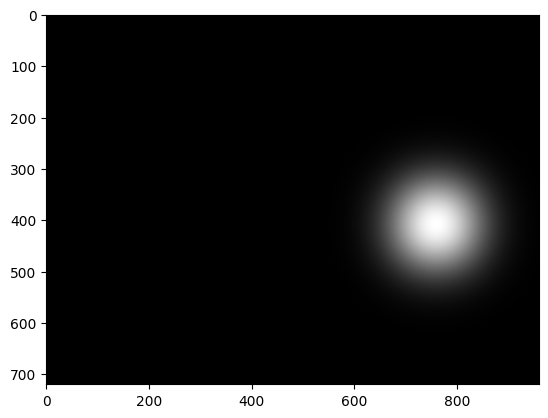

In [50]:
image_46 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_46.jpg", as_gray=True)
image_46 = np.where(image_46 == 1, 0, 1)
image_46 = ski.filters.gaussian(image_46, sigma=55)
image_46 = image_46 * 1e10
plt.imshow(image_46, cmap="gray")

dx46 = np.gradient(image_46, h, axis=1)
dy46 = np.gradient(image_46, h, axis=0)
dxx46 = np.gradient(dx46, h, axis=1)
dyy46 = np.gradient(dy46, h, axis=0)

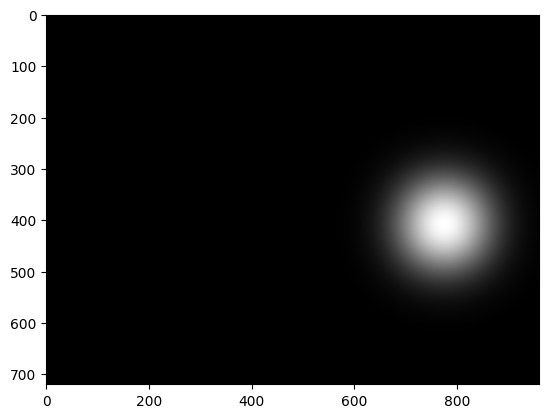

In [51]:
image_47 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_47.jpg", as_gray=True)
image_47 = np.where(image_47 == 1, 0, 1)
image_47 = ski.filters.gaussian(image_47, sigma=55)
image_47 = image_47 * 1e10
plt.imshow(image_47, cmap="gray")

dx47 = np.gradient(image_47, h, axis=1)
dy47 = np.gradient(image_47, h, axis=0)
dxx47 = np.gradient(dx47, h, axis=1)
dyy47 = np.gradient(dy47, h, axis=0)

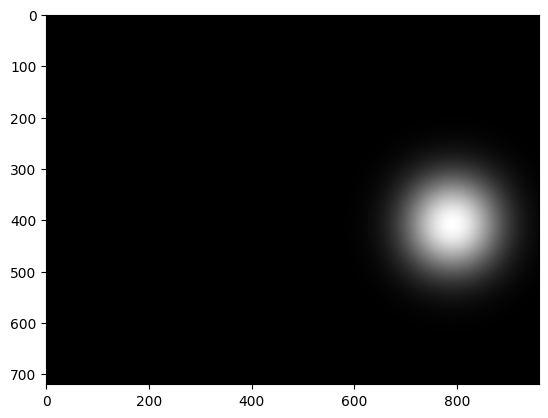

In [52]:
image_48 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_48.jpg", as_gray=True)
image_48 = np.where(image_48 == 1, 0, 1)
image_48 = ski.filters.gaussian(image_48, sigma=55)
image_48 = image_48 * 1e10
plt.imshow(image_48, cmap="gray")

dx48 = np.gradient(image_48, h, axis=1)
dy48 = np.gradient(image_48, h, axis=0)
dxx48 = np.gradient(dx48, h, axis=1)
dyy48 = np.gradient(dy48, h, axis=0)

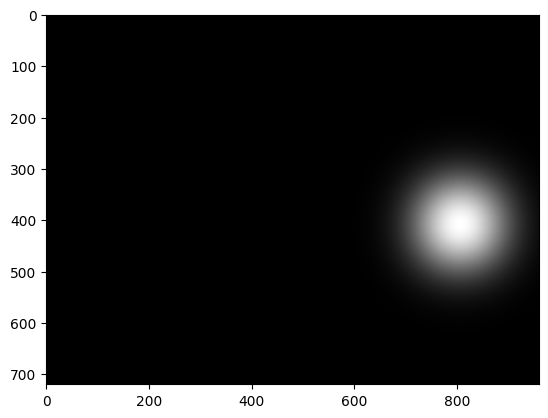

In [53]:
image_49 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_49.jpg", as_gray=True)
image_49 = np.where(image_49 == 1, 0, 1)
image_49 = ski.filters.gaussian(image_49, sigma=55)
image_49 = image_49 * 1e10
plt.imshow(image_49, cmap="gray")

dx49 = np.gradient(image_49, h, axis=1)
dy49 = np.gradient(image_49, h, axis=0)
dxx49 = np.gradient(dx49, h, axis=1)
dyy49 = np.gradient(dy49, h, axis=0)

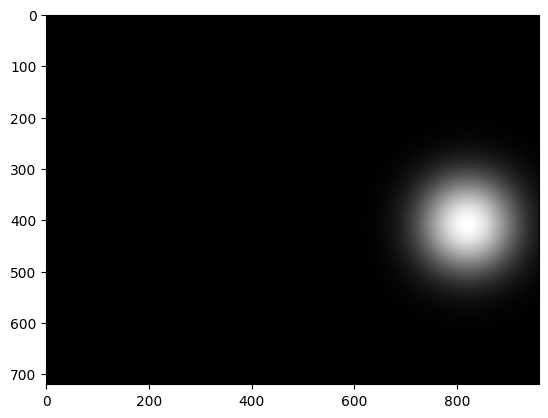

In [54]:
image_50 = ski.io.imread("C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Toy_Example_Data/moving_square_50.jpg", as_gray=True)
image_50 = np.where(image_50 == 1, 0, 1)
image_50 = ski.filters.gaussian(image_50, sigma=55)
image_50 = image_50 * 1e10
plt.imshow(image_50, cmap="gray")

dx50 = np.gradient(image_50, h, axis=1)
dy50 = np.gradient(image_50, h, axis=0)
dxx50 = np.gradient(dx50, h, axis=1)
dyy50 = np.gradient(dy50, h, axis=0)

In [79]:
# Concatenated data matrix of pixel values and gradients. 

us = [image_1, image_2, image_3, image_4, image_5, image_6, image_7, image_8, image_9, image_10,
      image_11, image_12, image_13, image_14, image_15, image_16, image_17, image_18,
      image_19, image_20, image_21, image_22, image_23, image_24, image_25,
      image_26, image_27, image_28, image_29, image_30, image_31, image_32, image_33,
      image_34, image_35, image_36, image_37, image_38, image_39, image_40, image_41,
      image_42, image_43, image_44, image_45, image_46, image_47, image_48, image_49, image_50]


uts = [us[i+1] - us[i] for i in range(len(us) - 1)]


dxs = [dx1, dx2, dx3, dx4, dx5, dx6, dx7, dx8, dx9, dx10, dx11, dx12, dx13, dx14,
          dx15, dx16, dx17, dx18, dx19, dx20, dx21, dx22, dx23, dx24, dx25, dx26, 
          dx27, dx28, dx29, dx30, dx31, dx32, dx33, dx34, dx35, dx36, dx37, dx38, dx39,
          dx40, dx41, dx42, dx43, dx44, dx45, dx46, dx47, dx48, dx49, dx50]


dys = [dy1, dy2, dy3,dy4, dy5, dy6, dy7, dy8, dy9, dy10, dy11, dy12, dy13, dy14,
       dy15, dy16, dy17, dy18, dy19, dy20, dy21, dy22, dy23, dy24, dy25, dy26, 
          dy27, dy28, dy29, dy30, dy31, dy32, dy33, dy34, dy35, dy36, dy37, dy38, dy39,
          dy40, dy41, dy42, dy43, dy44, dy45, dy46, dy47, dy48, dy49, dy50]


dxxs = [dxx1, dxx2, dxx3, dxx4, dxx5, dxx6, dxx7, dxx8, dxx9, dxx10, dxx11, dxx12, dxx13, dxx14,
          dxx15, dxx16, dxx17, dxx18, dxx19, dxx20, dxx21, dxx22, dxx23, dxx24, dxx25, dxx26, 
          dxx27, dxx28, dxx29, dxx30, dxx31, dxx32, dxx33, dxx34, dxx35, dxx36, dxx37, dxx38, dxx39,
          dxx40, dxx41, dxx42, dxx43, dxx44, dxx45, dxx46, dxx47, dxx48, dxx49, dxx50]

dyys = [dyy1, dyy2, dyy3, dyy4, dyy5, dyy6, dyy7, dyy8, dyy9, dyy10, dyy11, dyy12, dyy13, dyy14,
          dyy15, dyy16, dyy17, dyy18, dyy19, dyy20, dyy21, dyy22, dyy23, dyy24, dyy25, dyy26, 
          dyy27, dyy28, dyy29, dyy30, dyy31, dyy32, dyy33, dyy34, dyy35, dyy36, dyy37, dyy38, dyy39,
          dyy40, dyy41, dyy42, dyy43, dyy44, dyy45, dyy46, dyy47, dyy48, dyy49, dyy50]

flattened_arr_u = [u.flatten() for u in us]
merged_u = np.concatenate(flattened_arr_u)
dfu = pd.DataFrame({'u': merged_u})

# Flatten each matrix into a column vector (1D)
flattened_arrays = [dx.flatten() for dx in dxs]

# Concatenate all arrays into a single column
merged_column = np.concatenate(flattened_arrays)

# Create DataFrame with one column
dfx = pd.DataFrame({'dx': merged_column})

flattened_arr_dy = [dy.flatten() for dy in dys]
merged_dy = np.concatenate(flattened_arr_dy)
dfy = pd.DataFrame({'dy': merged_dy})

flattened_arr_dxx = [dxx.flatten() for dxx in dxxs]
merged_dxx = np.concatenate(flattened_arr_dxx)
dfxx = pd.DataFrame({'dxx': merged_dxx})

flattened_arr_dyy = [dyy.flatten() for dyy in dyys]
merged_dyy = np.concatenate(flattened_arr_dy)
dfyy = pd.DataFrame({'dyy': merged_dyy})

flattened_arr_udt = [dut.flatten() for dut in uts]
merged_dut = np.concatenate(flattened_arr_udt)
dfudt = pd.DataFrame({'dfudt': merged_dut})

combined_arr = pd.concat([dfu, dfx, dfy, dfxx, dfyy, dfudt], axis=1)
combined_arr

#combined_arr = np.concatenate(arrays)
#combined_arr

#combined_arr = pd.DataFrame(combined_arr)
#combined_arr

# Second derivative names kept for copy reference (will delete when unneeded)

# dxx1, dxx2, dxx3, dxx4, dxx5, dxx6, dxx7, dxx8, dxx9, dxx10, dxx11, dxx12, dxx13, dxx14,
#           dxx15, dxx16, dxx17, dxx18, dxx19, dxx20, dxx21, dxx22, dxx23, dxx24, dxx25, dxx26, 
#           dxx27, dxx28, dxx29, dxx30, dxx31, dxx32, dxx33, dxx34, dxx35, dxx36, dxx37, dxx38, dxx39,
#           dxx40, dxx41, dxx42, dxx43, dxx44, dxx45, dxx46, dxx47, dxx48, dxx49, dxx50,
#           dyy1, dyy2, dyy3, dyy4, dyy5, dyy6, dyy7, dyy8, dyy9, dyy10, dyy11, dyy12, dyy13, dyy14,
#           dyy15, dyy16, dyy17, dyy18, dyy19, dyy20, dyy21, dyy22, dyy23, dyy24, dyy25, dyy26, 
#           dyy27, dyy28, dyy29, dyy30, dyy31, dyy32, dyy33, dyy34, dyy35, dyy36, dyy37, dyy38, dyy39,
#           dyy40, dyy41, dyy42, dyy43, dyy44, dyy45, dyy46, dyy47, dyy48, dyy49, dyy50


,u,dx,dy,dxx,dyy,dfudt
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
34559995,0.0,0.0,0.0,0.0,0.0,NaN
34559996,0.0,0.0,0.0,0.0,0.0,NaN
34559997,0.0,0.0,0.0,0.0,0.0,NaN
34559998,0.0,0.0,0.0,0.0,0.0,NaN


In [80]:
# Dimensions of data are 720 by 192000 prior to 0's drop.

# Drop rows with all zeros

combined_arr = combined_arr[(combined_arr != 0).any(axis=1)]
print(combined_arr.shape)

# Drop columns with all zeros

combined_arr = combined_arr.loc[:, (combined_arr != 0).any(axis=0)]
print(combined_arr.shape)

# After dropping all zero's, data size left is 15729791 by 6.

combined_arr

(15444568, 6)
(15444568, 6)


,u,dx,dy,dxx,dyy,dfudt
124800,0.0,0.0,1.798913e-10,0.0,1.798913e-10,0.0
124801,0.0,0.0,1.916783e-10,0.0,1.916783e-10,0.0
124802,0.0,0.0,2.041702e-10,0.0,2.041702e-10,0.0
124803,0.0,0.0,2.174042e-10,0.0,2.174042e-10,0.0
124804,0.0,0.0,2.314196e-10,0.0,2.314196e-10,0.0
...,...,...,...,...,...,...
34559995,0.0,0.0,0.000000e+00,0.0,0.000000e+00,NaN
34559996,0.0,0.0,0.000000e+00,0.0,0.000000e+00,NaN
34559997,0.0,0.0,0.000000e+00,0.0,0.000000e+00,NaN
34559998,0.0,0.0,0.000000e+00,0.0,0.000000e+00,NaN


In [81]:
# Data Cleaning (Dropping NA's)

combined_arr = combined_arr.dropna()
print(combined_arr.shape)
combined_arr
# print(max(combined_arr["dfudt"]))
# print(max(combined_arr["u"]))

(14753368, 6)


,u,dx,dy,dxx,dyy,dfudt
124800,0.0,0.0,1.798913e-10,0.0,1.798913e-10,0.0
124801,0.0,0.0,1.916783e-10,0.0,1.916783e-10,0.0
124802,0.0,0.0,2.041702e-10,0.0,2.041702e-10,0.0
124803,0.0,0.0,2.174042e-10,0.0,2.174042e-10,0.0
124804,0.0,0.0,2.314196e-10,0.0,2.314196e-10,0.0
...,...,...,...,...,...,...
33836155,0.0,0.0,-7.039467e-08,0.0,-7.039467e-08,0.0
33836156,0.0,0.0,-6.807625e-08,0.0,-6.807625e-08,0.0
33836157,0.0,0.0,-6.581307e-08,0.0,-6.581307e-08,0.0
33836158,0.0,0.0,-6.360470e-08,0.0,-6.360470e-08,0.0


In [82]:
# LASSO regression on cleaned DataFrame. 

data_mat_X = combined_arr.drop(columns=["dfudt"])
data_mat_y = combined_arr["dfudt"]

data_mat_X = data_mat_X.values
data_mat_y = data_mat_y.values

X_train, X_test, y_train, y_test = train_test_split(data_mat_X, data_mat_y, test_size=0.2,
                                    random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
reg_mod = sm.OLS(y_train, X_train)
results = reg_mod.fit()
summary = results.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          2.784e+07
Date:                Mon, 14 Apr 2025   Prob (F-statistic):                        0.00
Time:                        21:26:46   Log-Likelihood:                      2.9396e+07
No. Observations:            11802694   AIC:                                 -5.879e+07
Df Residuals:                11802689   BIC:                                 -5.879e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

$ \text{Proposed model from linear regression OLS by p-value} \newline$
$\frac{du}{dt} = u -0.0668 \frac{du}{dx}-0.0017 \frac{d^{2}u}{dx^{2}}$

In [84]:
lasso_ode = Lasso(alpha=0.1)
lasso_ode.fit(X_train, y_train)

print("LASSO Coefficients:", lasso_ode.coef_)

LASSO Coefficients: [-0. -0. -0.  0. -0.]


In [85]:
# Computing prediction accuracy from testing set. 

y_pred_ode = lasso_ode.predict(X_test)
mse_ode = mean_squared_error(y_test, y_pred_ode)
print("Mean Squared Error:", mse_ode)

Mean Squared Error: 0.005126868258018411


In [86]:
# Tuning alpha parameter via CV with cv=5 folds. 

lasso_cv_ode = LassoCV(alphas=np.logspace(-3,1,100), cv=5)
lasso_cv_ode.fit(X_train, y_train)

print("Optimal alpha:", lasso_cv_ode.alpha_)

Optimal alpha: 0.001


In [87]:
# Checking number of zero coefficients (how many features dropped)

check = sum(lasso_cv_ode.coef_ == 0)
check

3

In [88]:
# LASSO Regularized regression for feature selection. Coefficient results
# indicate that we drop dy and dyy, keep dx and dxx for ODE model.

lasso_ode = Lasso(alpha=0.001)
lasso_ode.fit(X_train, y_train)

print("LASSO Coefficients:", lasso_ode.coef_)

LASSO Coefficients: [-0.         -0.06720827 -0.          0.00836914 -0.        ]


$u_{t} = u - 0.0672 u_{x}-0.0084 u_{xx}$

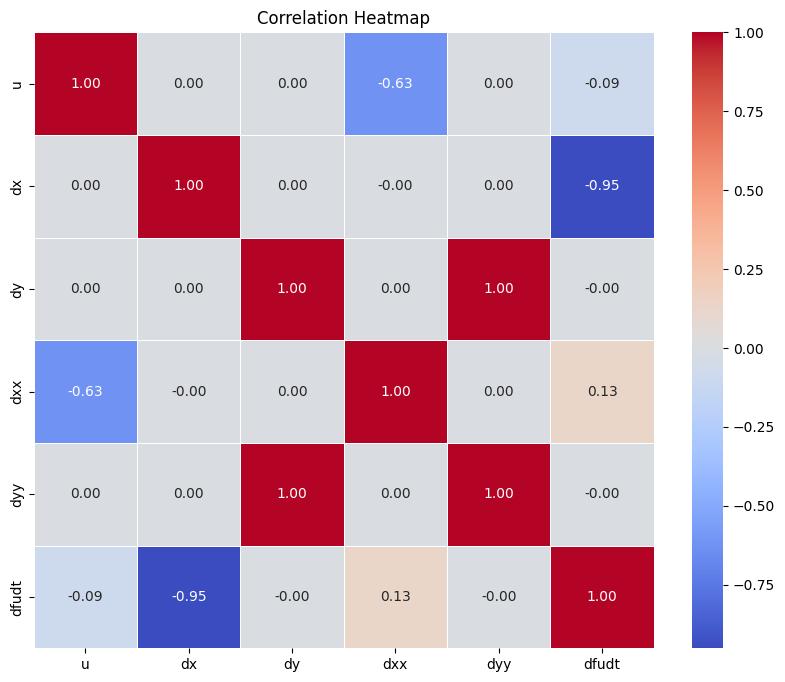

In [89]:
corr_mat = combined_arr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [66]:
# Experimenting with Pysindy. 

#X_train.shape
# test_model = ps.SINDy(feature_names=["u", "dx", "dy", "dxx", "dyy", "dfudt"])
# test_model.fit(X_train)
# test_model.print()

t = np.linspace(0, 1, 100)
x = 3 * np.exp(-2 * t)
y = 0.5 * np.exp(t)
X = np.stack((x, y), axis=-1)

model = ps.SINDy(feature_names=["x", "y"])
model.fit(X, t=t)
model.print()

(x)' = -2.000 x
(y)' = 1.000 y


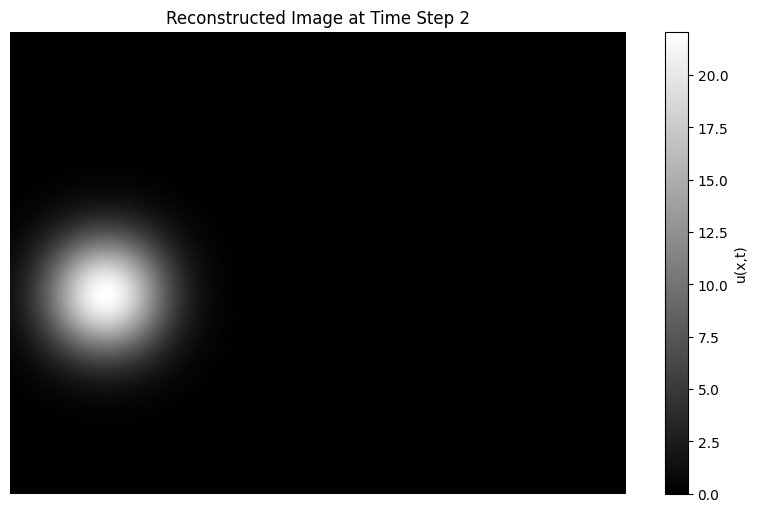

In [91]:
# Define time parameters
dt = 0.1  # Time step
T = 10  # Total simulation time
Nt = int(T / dt)  # Number of time steps

# Given u_x and u_xx (single images)
ux = dx1  # Shape: (720, 960)
uxx = dxx1  # Shape: (720, 960)
u_fun = image_1

# Ensure ux and uxx have the same shape
Nx, Ny = ux.shape  # Image dimensions (720, 960)

# Initial condition u(x, 0) (can be zeros or given image)
u = np.zeros((Nt, Nx, Ny))  # Shape: (time, height, width)

# Time-stepping loop to reconstruct u(x, t)
for n in range(1, Nt):
    u_t = u_fun -0.0672 * ux - 0.0084 * uxx  # Use only dx1 and dxx1
    u[n, :, :] = u[n-1, :, :] + dt * u_t  # Forward Euler step

plt.figure(figsize=(10, 6))
plt.imshow(u[-1], cmap='gray')  # Show final state u(x, T)
plt.colorbar(label='u(x,t)')
plt.title('Reconstructed Image at Time Step 2')
plt.axis('off')
plt.show()

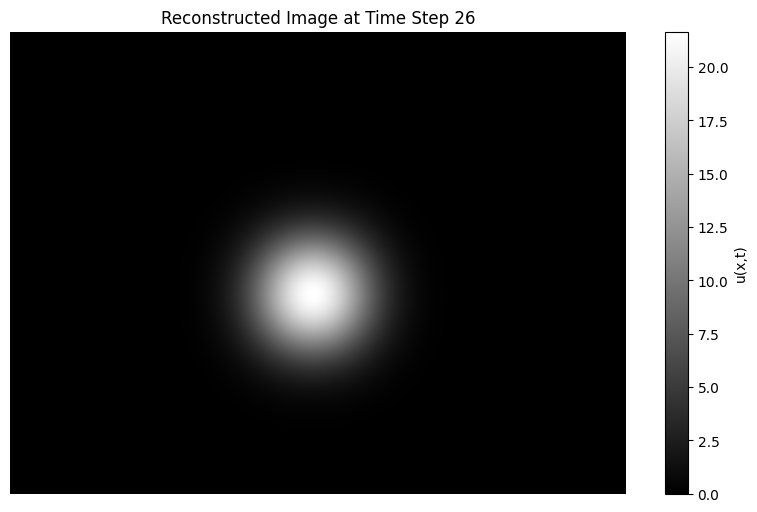

In [92]:
# Define time parameters

dt = 0.1  # Time step
T = 10  # Total simulation time
Nt = int(T / dt)  # Number of time steps

# Given u_x and u_xx (single images)
ux = dx25  # Shape: (720, 960)
uxx = dxx25  # Shape: (720, 960)
u_fun = image_25

# Ensure ux and uxx have the same shape
Nx, Ny = ux.shape  # Image dimensions (720, 960)

# Initial condition u(x, 0) (can be zeros or given image)
u = np.zeros((Nt, Nx, Ny))  # Shape: (time, height, width)

# Time-stepping loop to reconstruct u(x, t)
for n in range(1, Nt):
    u_t = u_fun -0.0672 * ux- 0.0084 * uxx  # Use only dx1 and dxx1
    u[n, :, :] = u[n-1, :, :] + dt * u_t  # Forward Euler step

plt.figure(figsize=(10, 6))
plt.imshow(u[-1], cmap='gray')  # Show final state u(x, T)
plt.colorbar(label='u(x,t)')
plt.title('Reconstructed Image at Time Step 26')
plt.axis('off')
plt.show()

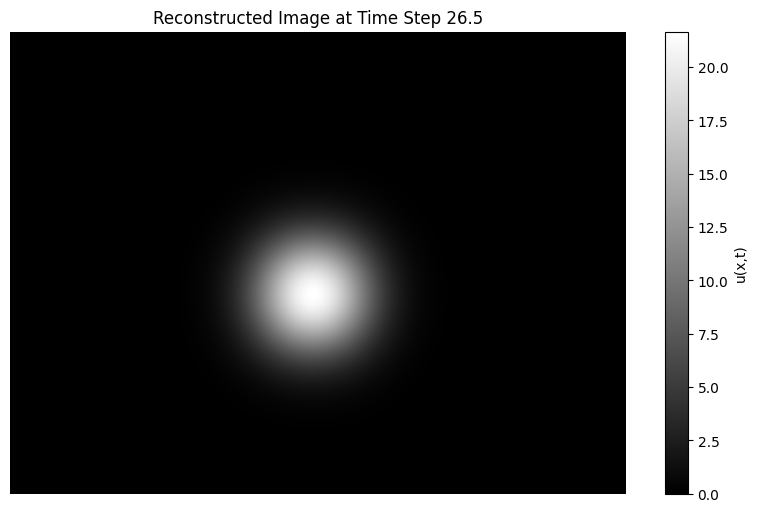

In [94]:
# Define time parameters

dt = 0.1  # Time step
T = 10  # Total simulation time
Nt = int(T / dt)  # Number of time steps

# Given u_x and u_xx (single images)
ux = dx25  # Shape: (720, 960)
uxx = dxx25  # Shape: (720, 960)
u_fun = image_25

# Ensure ux and uxx have the same shape
Nx, Ny = ux.shape  # Image dimensions (720, 960)

# Initial condition u(x, 0) (can be zeros or given image)
u = np.zeros((Nt, Nx, Ny))  # Shape: (time, height, width)

# Time-stepping loop to reconstruct u(x, t)
for n in range(1, Nt):
    u_t = u_fun + 0.5 * (-0.0672 * ux- 0.0084 * uxx)  # Use only dx1 and dxx1
    u[n, :, :] = u[n-1, :, :] + dt * u_t  # Forward Euler step

plt.figure(figsize=(10, 6))
plt.imshow(u[-1], cmap='gray')  # Show final state u(x, T)
plt.colorbar(label='u(x,t)')
plt.title('Reconstructed Image at Time Step 26.5')
plt.axis('off')
plt.show()

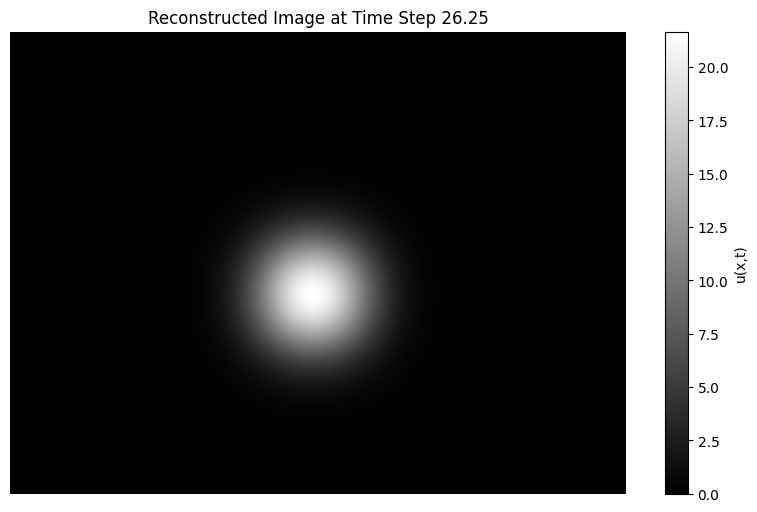

In [95]:
# Define time parameters

dt = 0.1  # Time step
T = 10  # Total simulation time
Nt = int(T / dt)  # Number of time steps

# Given u_x and u_xx (single images)
ux = dx25  # Shape: (720, 960)
uxx = dxx25  # Shape: (720, 960)
u_fun = image_25

# Ensure ux and uxx have the same shape
Nx, Ny = ux.shape  # Image dimensions (720, 960)

# Initial condition u(x, 0) (can be zeros or given image)
u = np.zeros((Nt, Nx, Ny))  # Shape: (time, height, width)

# Time-stepping loop to reconstruct u(x, t)
for n in range(1, Nt):
    u_t = u_fun + 0.25 * (-0.0672 * ux- 0.0084 * uxx)  # Use only dx1 and dxx1
    u[n, :, :] = u[n-1, :, :] + dt * u_t  # Forward Euler step

plt.figure(figsize=(10, 6))
plt.imshow(u[-1], cmap='gray')  # Show final state u(x, T)
plt.colorbar(label='u(x,t)')
plt.title('Reconstructed Image at Time Step 26.25')
plt.axis('off')
plt.show()

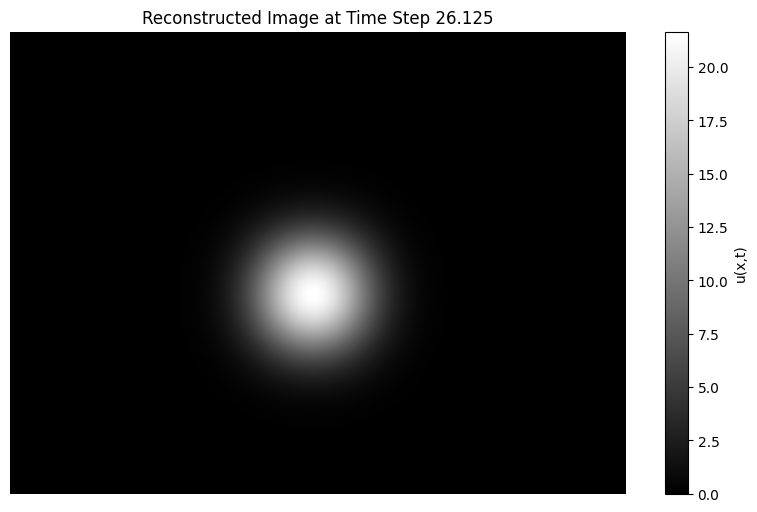

In [96]:
# Define time parameters

dt = 0.1  # Time step
T = 10  # Total simulation time
Nt = int(T / dt)  # Number of time steps

# Given u_x and u_xx (single images)
ux = dx25  # Shape: (720, 960)
uxx = dxx25  # Shape: (720, 960)
u_fun = image_25

# Ensure ux and uxx have the same shape
Nx, Ny = ux.shape  # Image dimensions (720, 960)

# Initial condition u(x, 0) (can be zeros or given image)
u = np.zeros((Nt, Nx, Ny))  # Shape: (time, height, width)

# Time-stepping loop to reconstruct u(x, t)
for n in range(1, Nt):
    u_t = u_fun + 0.125 * (-0.0672 * ux- 0.0084 * uxx)  # Use only dx1 and dxx1
    u[n, :, :] = u[n-1, :, :] + dt * u_t  # Forward Euler step

plt.figure(figsize=(10, 6))
plt.imshow(u[-1], cmap='gray')  # Show final state u(x, T)
plt.colorbar(label='u(x,t)')
plt.title('Reconstructed Image at Time Step 26.125')
plt.axis('off')
plt.show()

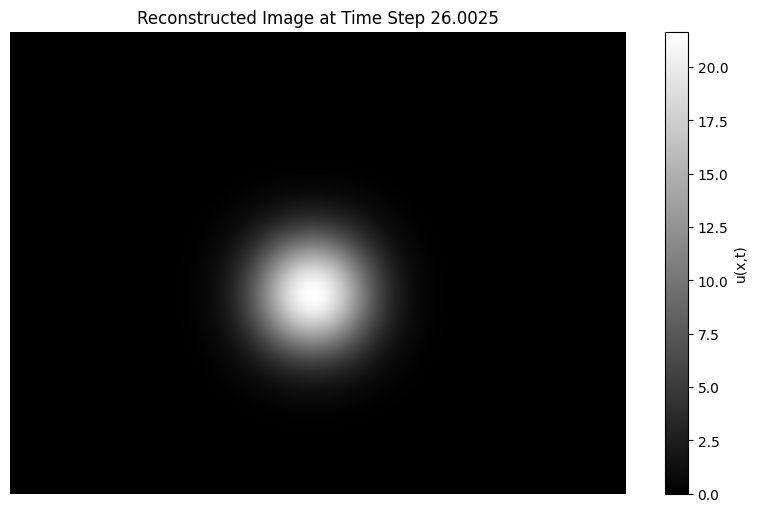

In [97]:
# Define time parameters

dt = 0.1  # Time step
T = 10  # Total simulation time
Nt = int(T / dt)  # Number of time steps

# Given u_x and u_xx (single images)
ux = dx25  # Shape: (720, 960)
uxx = dxx25  # Shape: (720, 960)
u_fun = image_25

# Ensure ux and uxx have the same shape
Nx, Ny = ux.shape  # Image dimensions (720, 960)

# Initial condition u(x, 0) (can be zeros or given image)
u = np.zeros((Nt, Nx, Ny))  # Shape: (time, height, width)

# Time-stepping loop to reconstruct u(x, t)
for n in range(1, Nt):
    u_t = u_fun + 0.0025 * (-0.0672 * ux- 0.0084 * uxx)  # Use only dx1 and dxx1
    u[n, :, :] = u[n-1, :, :] + dt * u_t  # Forward Euler step

plt.figure(figsize=(10, 6))
plt.imshow(u[-1], cmap='gray')  # Show final state u(x, T)
plt.colorbar(label='u(x,t)')
plt.title('Reconstructed Image at Time Step 26.0025')
plt.axis('off')
plt.show()

In [ ]:
# Assuming these lists are already defined:
# image_list = [image_1, image_2, ..., image_50]
# ux_list = [ux_1, ux_2, ..., ux_50]
# uxx_list = [uxx_1, uxx_2, ..., uxx_50]

dt = 0.25  # Time step between frames
num_frames = len(us)  # Should be 50

Nx, Ny = us[0].shape
u = np.zeros((num_frames + 1, Nx, Ny))  # +1 for initial condition

# Time-stepping using forward Euler
for n in range(1, num_frames + 1):  # n = 1 to 50
    idx = n - 1  # Index for current image and derivative arrays
    u_fun = us[idx]
    ux = dxs[idx]
    uxx = dxxs[idx]

    u_t = u_fun + 0.25 * (-0.0672 * ux - 0.0084 * uxx)
    u[n, :, :] = u[n - 1, :, :] + dt * u_t

# # Plot at selected time steps (from 1 to 12.5 in 0.25 increments)
# time_steps_to_plot = np.arange(1, (num_frames + 1) * dt, dt)
# indices_to_plot = [int(t / dt) for t in time_steps_to_plot]

# for idx in indices_to_plot:
#     if idx >= len(u):  # Safety check
#         break
#     plt.figure(figsize=(10, 6))
#     plt.imshow(u[idx], cmap='gray')
#     plt.colorbar(label='u(x,t)')
#     plt.title(f'Reconstructed Image at Time Step {idx * dt:.2f}')
#     plt.axis('off')
#     plt.show()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(u[0], cmap='gray', animated=True)
plt.axis('off')
plt.title("Reconstructed Image Over Time")
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('u(x,t)')

# Update function for animation
def update(frame):
    im.set_array(u[frame])
    ax.set_title(f"Reconstructed Image at t = {frame * dt:.2f}")
    return [im]

# Create animation
ani = animation.FuncAnimation(
    fig, update, frames=len(u), interval=100, blit=True
)

# Display the animation (in Jupyter) or save as GIF
plt.close()  # Avoid duplicate static image in notebook
ani.save("reconstructed_evolution_3.gif", writer="pillow", fps=10)

In [119]:
for n in range(1, num_frames + 1):
    u_prev = u[n - 1]

    # First and second derivatives along x (axis=1) — you could add y if needed
    ux = np.gradient(u_prev, axis=1)
    uxx = np.gradient(ux, axis=1)

    u_t = u_prev + 0.25 * (-0.0672 * ux - 0.0084 * uxx)
    u[n] = u[n - 1] + dt * u_t

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(u[0], cmap='gray', animated=True)
plt.axis('off')
plt.title("Reconstructed Image Over Time")
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('u(x,t)')

# Update function for animation
def update(frame):
    im.set_array(u[frame])
    ax.set_title(f"Reconstructed Image at t = {frame * dt:.2f}")
    return [im]

# Create animation
ani = animation.FuncAnimation(
    fig, update, frames=len(u), interval=100, blit=True
)

# Display the animation (in Jupyter) or save as GIF
plt.close()  # Avoid duplicate static image in notebook
ani.save("reconstructed_evolution_3.gif", writer="pillow", fps=10)

In [105]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(u[0], cmap='gray', animated=True)
plt.axis('off')
plt.title("Reconstructed Image Over Time")
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('u(x,t)')

# Update function for animation
def update(frame):
    im.set_array(u[frame])
    ax.set_title(f"Reconstructed Image at t = {frame * dt:.2f}")
    return [im]

# Create animation
ani = animation.FuncAnimation(
    fig, update, frames=len(u), interval=100, blit=True
)

# Display the animation (in Jupyter) or save as GIF
plt.close()  # Avoid duplicate static image in notebook
ani.save("reconstructed_evolution.gif", writer="pillow", fps=10)

In [114]:
# Now modifying code to reflect 1-D advection equation

c = 60  # Advection speed
dt = 0.25
dx = 1.0  # Assuming pixel spacing = 1
num_steps = 50

initial_image = us[0]
Nx, Ny = initial_image.shape
u = np.zeros((num_steps + 1, Nx, Ny))
u[0] = initial_image

# Upwind scheme for 1D advection in x-direction
for n in range(1, num_steps + 1):
    u_prev = u[n - 1].copy()

    # Compute ux using upwind finite differences
    ux = np.zeros_like(u_prev)
    ux[:, 1:] = (u_prev[:, 1:] - u_prev[:, :-1]) / dx  # Backward difference

    # Update using advection equation
    u[n] = u_prev - dt * c * ux

u.shape

(51, 720, 960)

In [ ]:
# # Set up the figure and axis
# fig, ax = plt.subplots(figsize=(10, 6))
# im = ax.imshow(u[0], cmap='gray', animated=True)
# plt.axis('off')
# plt.title("Reconstructed Image Over Time")
# cbar = plt.colorbar(im, ax=ax)
# cbar.set_label('u(x,t)')

# # Update function for animation
# def update(frame):
#     im.set_array(u[frame])
#     ax.set_title(f"Reconstructed Image at t = {frame * dt:.2f}")
#     return [im]

# # Create animation
# ani = animation.FuncAnimation(
#     fig, update, frames=len(u), interval=100, blit=True
# )

# # Display the animation (in Jupyter) or save as GIF
# plt.close()  # Avoid duplicate static image in notebook
# ani.save("reconstructed_evolution_2.gif", writer="pillow", fps=10)

In [ ]:

dt = 0.1  # Time step
T = 10  # Total simulation time
Nt = int(T / dt)  # Number of time steps

# Given u_x and u_xx (single images)
ux = dx25  # Shape: (720, 960)
uxx = dxx25  # Shape: (720, 960)
u_fun = image_25

# Ensure ux and uxx have the same shape
Nx, Ny = ux.shape  # Image dimensions (720, 960)

# Initial condition u(x, 0) (can be zeros or given image)
u = np.zeros((Nt, Nx, Ny))  # Shape: (time, height, width)

# Time-stepping loop to reconstruct u(x, t)
for n in range(1, Nt):
    u_t = u_fun + 0.25 * (-0.0672 * ux- 0.0084 * uxx)  # Use only dx1 and dxx1
    u[n, :, :] = u[n-1, :, :] + dt * u_t  # Forward Euler step

plt.figure(figsize=(10, 6))
plt.imshow(u[-1], cmap='gray')  # Show final state u(x, T)
plt.colorbar(label='u(x,t)')
plt.title('Reconstructed Image at Time Step 26.25')
plt.axis('off')
plt.show()